In [117]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt 
import textwrap
from matplotlib.dates import DateFormatter

In [118]:
# Folder path
path =  "../data/"

# Which values are considered NaN
na_vls = ['#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', 
               '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 
                'null', '...']

nrows = 200000

# Load datasets
df_prod = pd.read_csv(path+"New_ProdutosVarejos.csv", na_values = na_vls, nrows = nrows)
df_coletas = pd.read_csv(path+"New_Coletas.csv", na_values = na_vls, nrows = nrows)

'''df_prod = pd.read_csv(path+"ProdutosVarejos.csv", na_values = na_vls)
df_coletas = pd.read_csv(path+"Coletas.csv", na_values = na_vls)'''

'df_prod = pd.read_csv(path+"ProdutosVarejos.csv", na_values = na_vls)\ndf_coletas = pd.read_csv(path+"Coletas.csv", na_values = na_vls)'

C:\Users\luiza\AppData\Local\Temp\ipykernel_14860\3731767862.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).mean()[["SuggestedPrice","FinalPrice"]]


Retailer                                        Amazon
Product                                               
Lava Roupas Líquido Brilhante Limpeza Total 3L   45.14


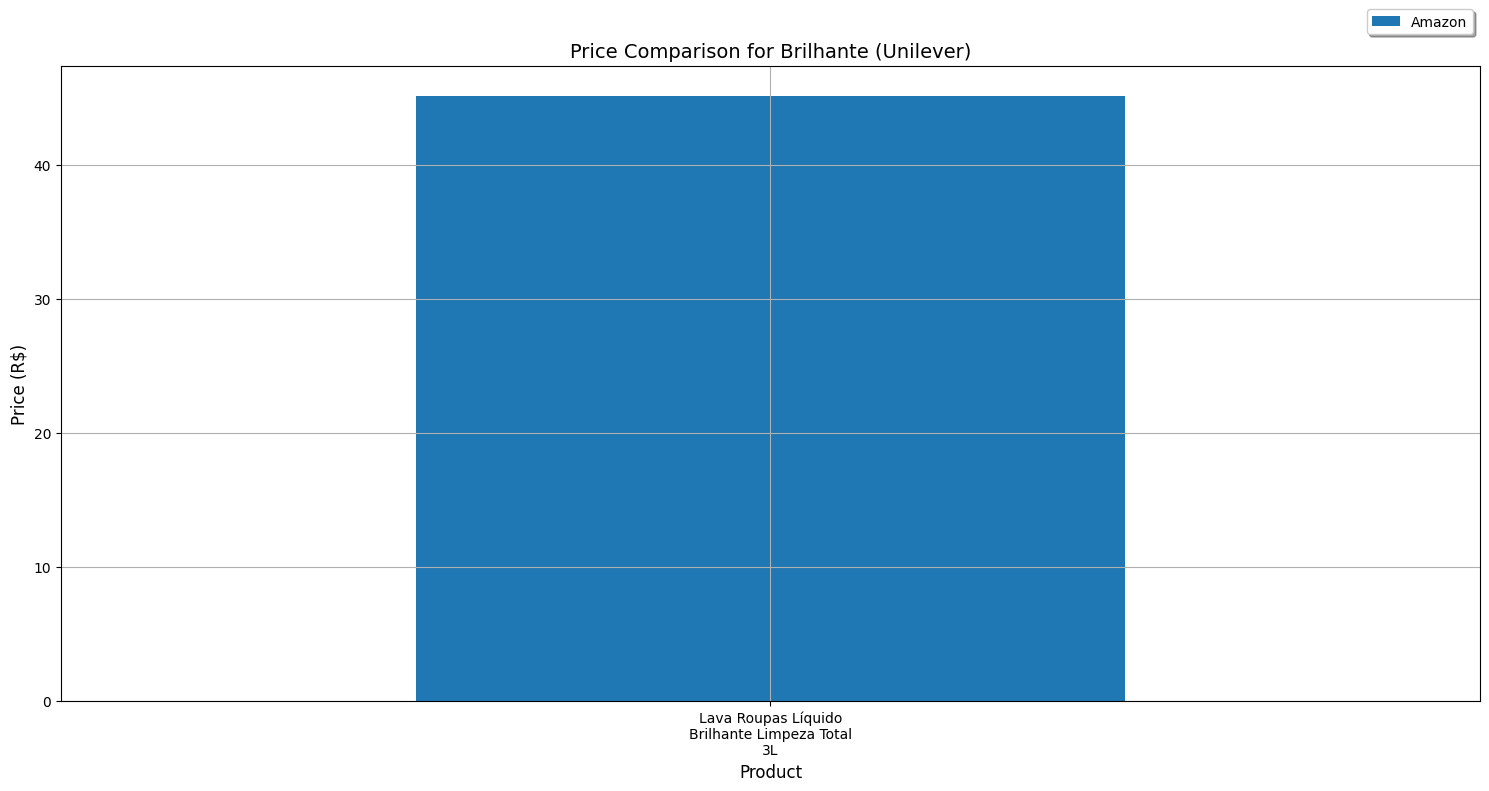

Retailer                                            Amazon  DrogaRaia  \
Product                                                                 
Shampoo Anticaspa Clear Men Limpeza Diária 2 em...   42.19      48.51   
Shampoo Anticaspa Clear Sports Men Limpeza Prof...   39.26      49.98   

Retailer                                            Mercado Livre  
Product                                                            
Shampoo Anticaspa Clear Men Limpeza Diária 2 em...          39.16  
Shampoo Anticaspa Clear Sports Men Limpeza Prof...          39.31  


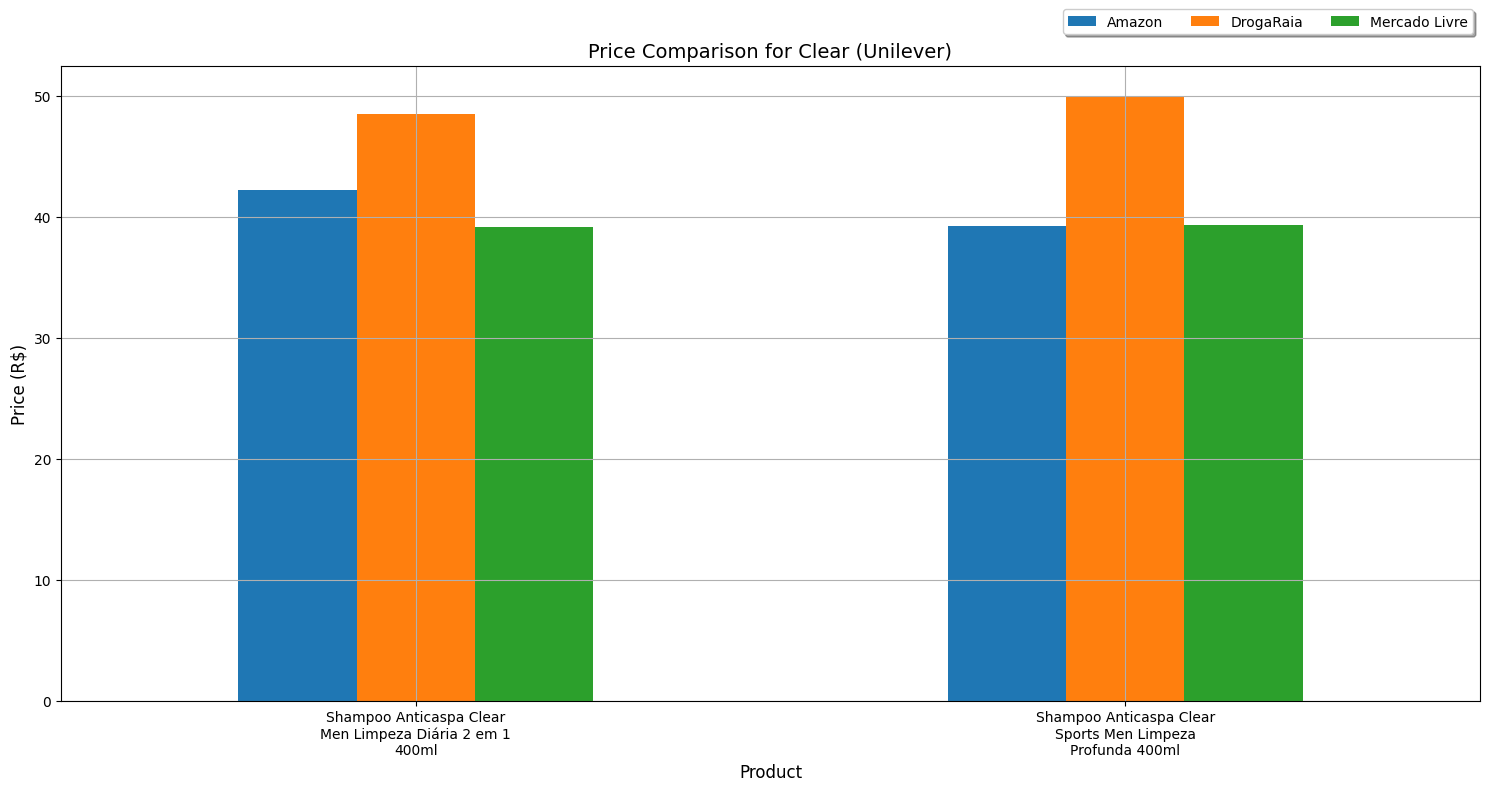

Retailer                               Amazon  DrogaRaia
Product                                                 
Creme Dental Closeup Triple Menta 70g    2.72       7.09


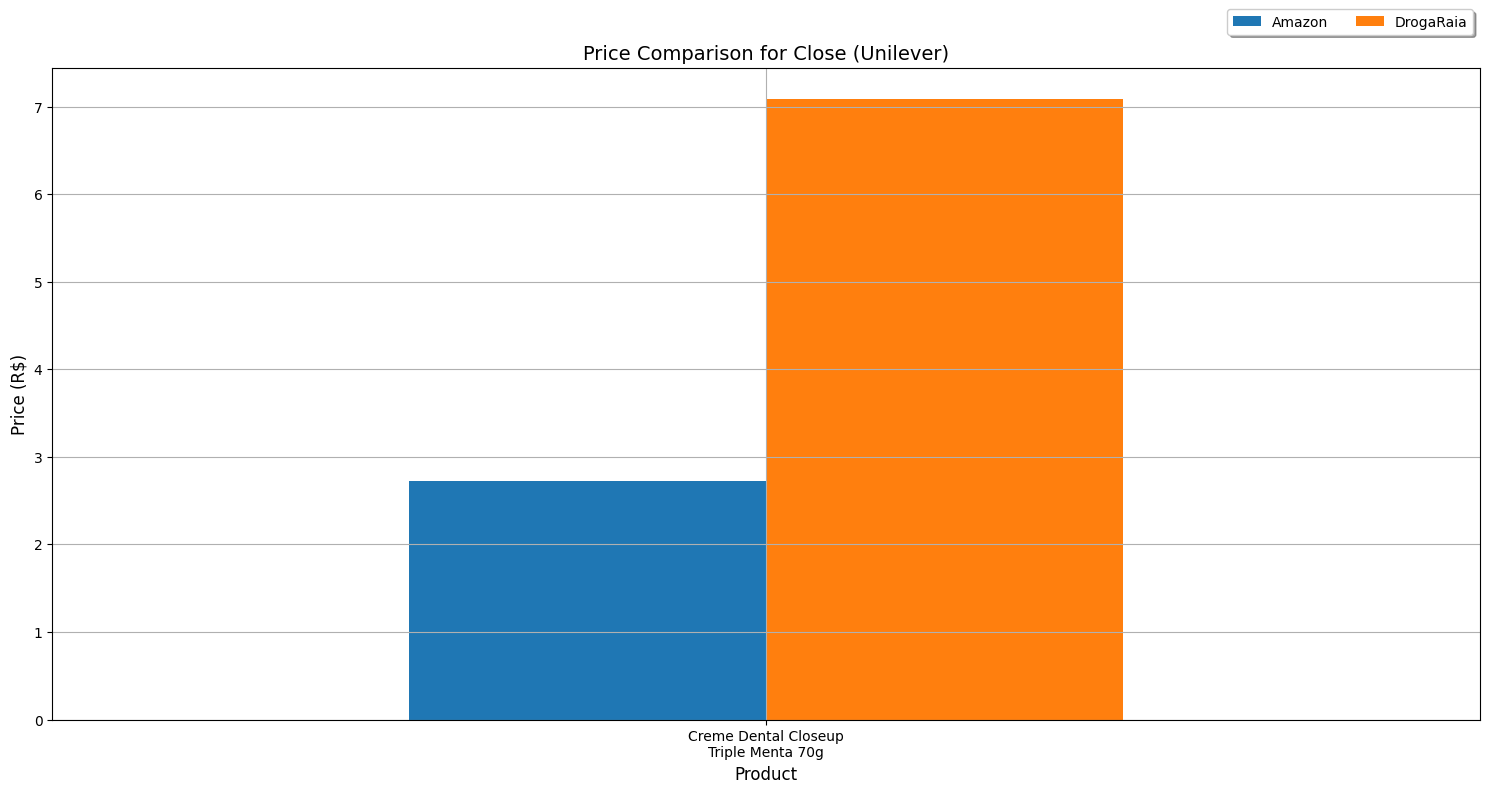

Retailer                                 Amazon  DrogaRaia
Product                                                   
Gel Dental Close Up Liquifresh Ice 100g    9.36       8.17


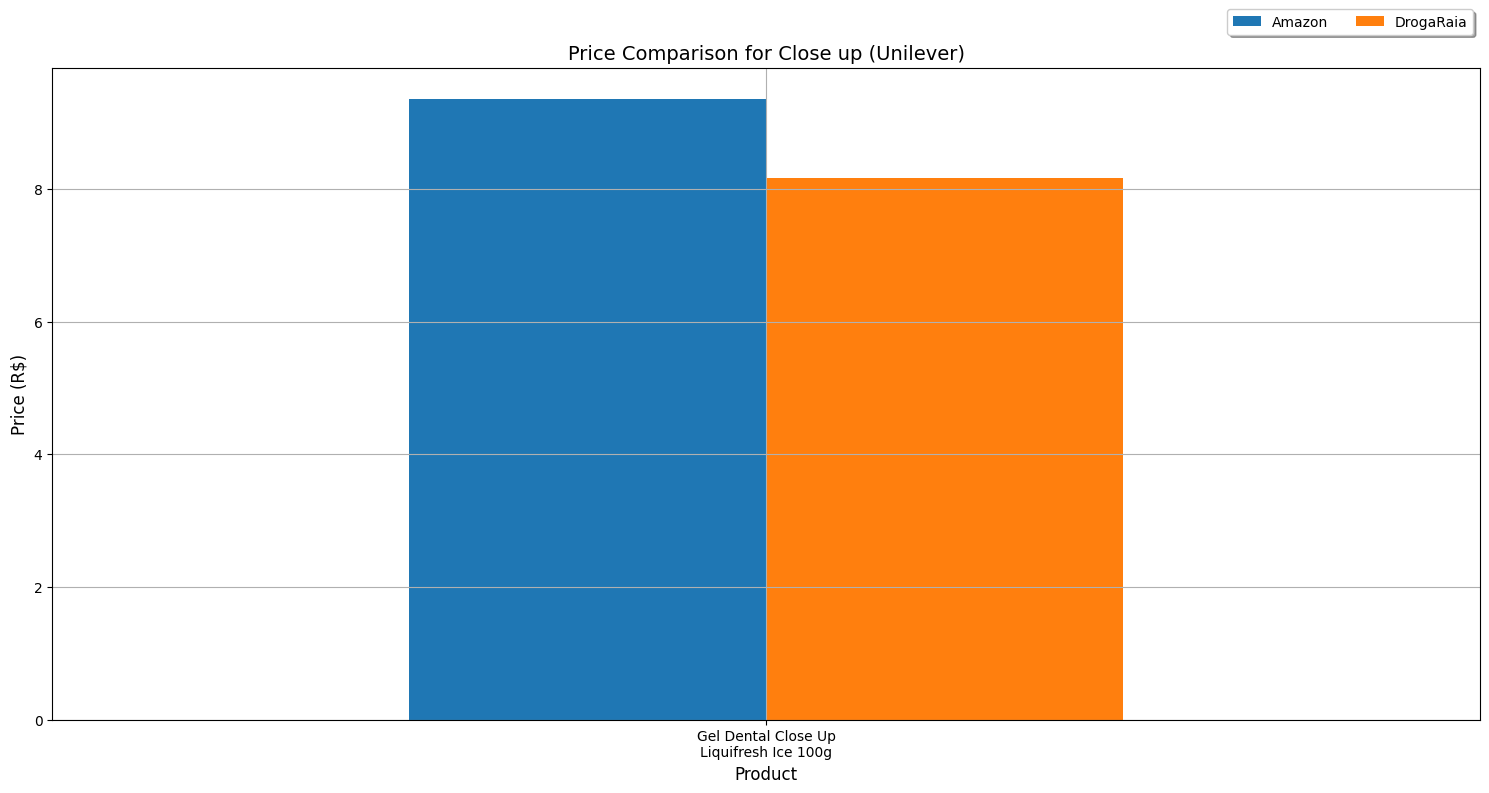

Retailer                                            Amazon
Product                                                   
Amaciante Comfort Pro Lavanderia Profissional 10L    74.51
Amaciante Concentrado  Comfort Brisa Elegante 1 L    35.96
Amaciante Concentrado Comfort Frescor Intenso 5...   21.68
Amaciante Concentrado Comfort Puro Cuidado 1 L       36.52


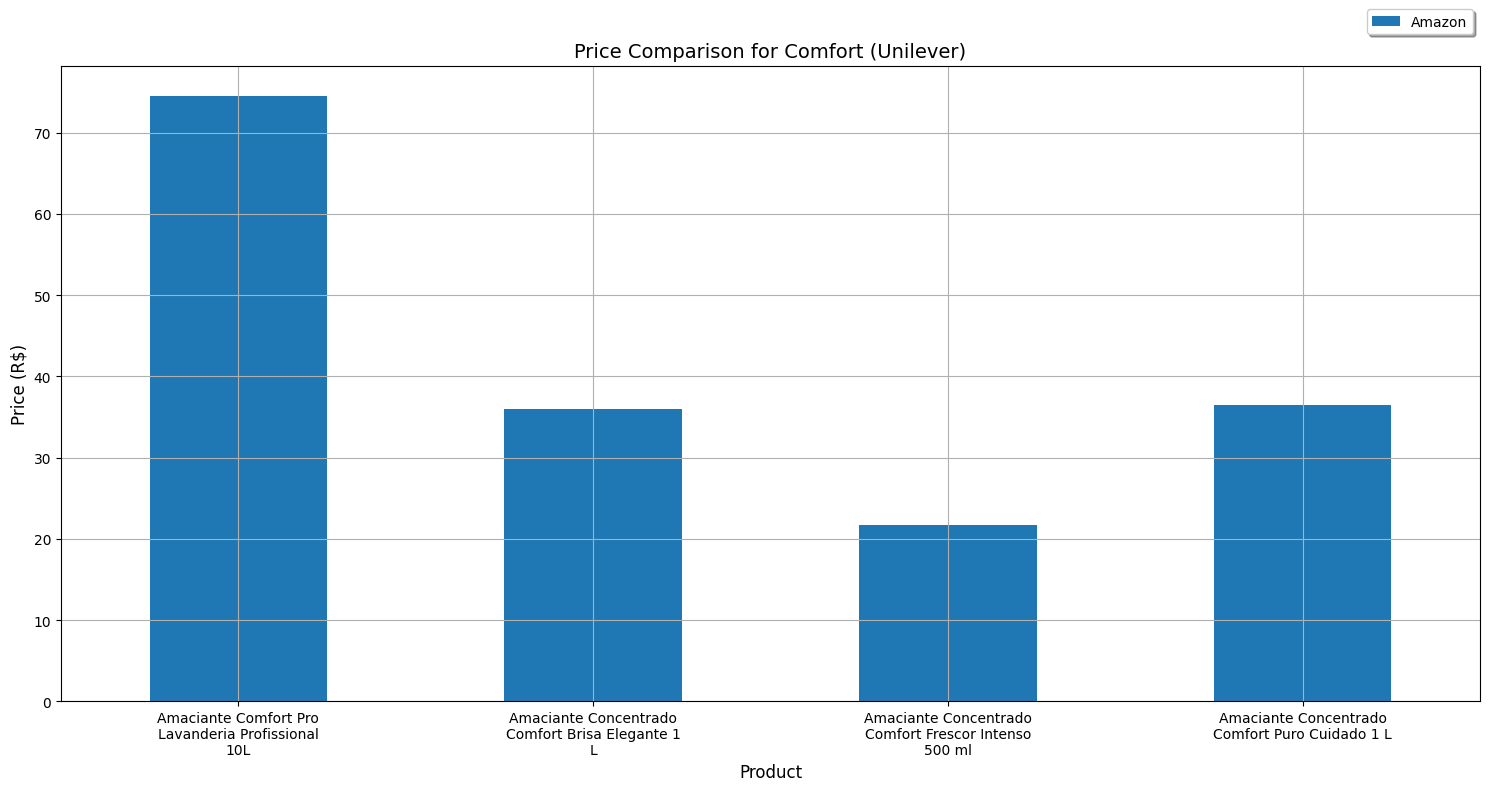

Retailer                                        Amazon  DrogaRaia  \
Product                                                             
Sabonete em Barra Dove Original 90g 6 unidades   43.81      27.36   

Retailer                                        Mercado Livre  
Product                                                        
Sabonete em Barra Dove Original 90g 6 unidades          44.37  


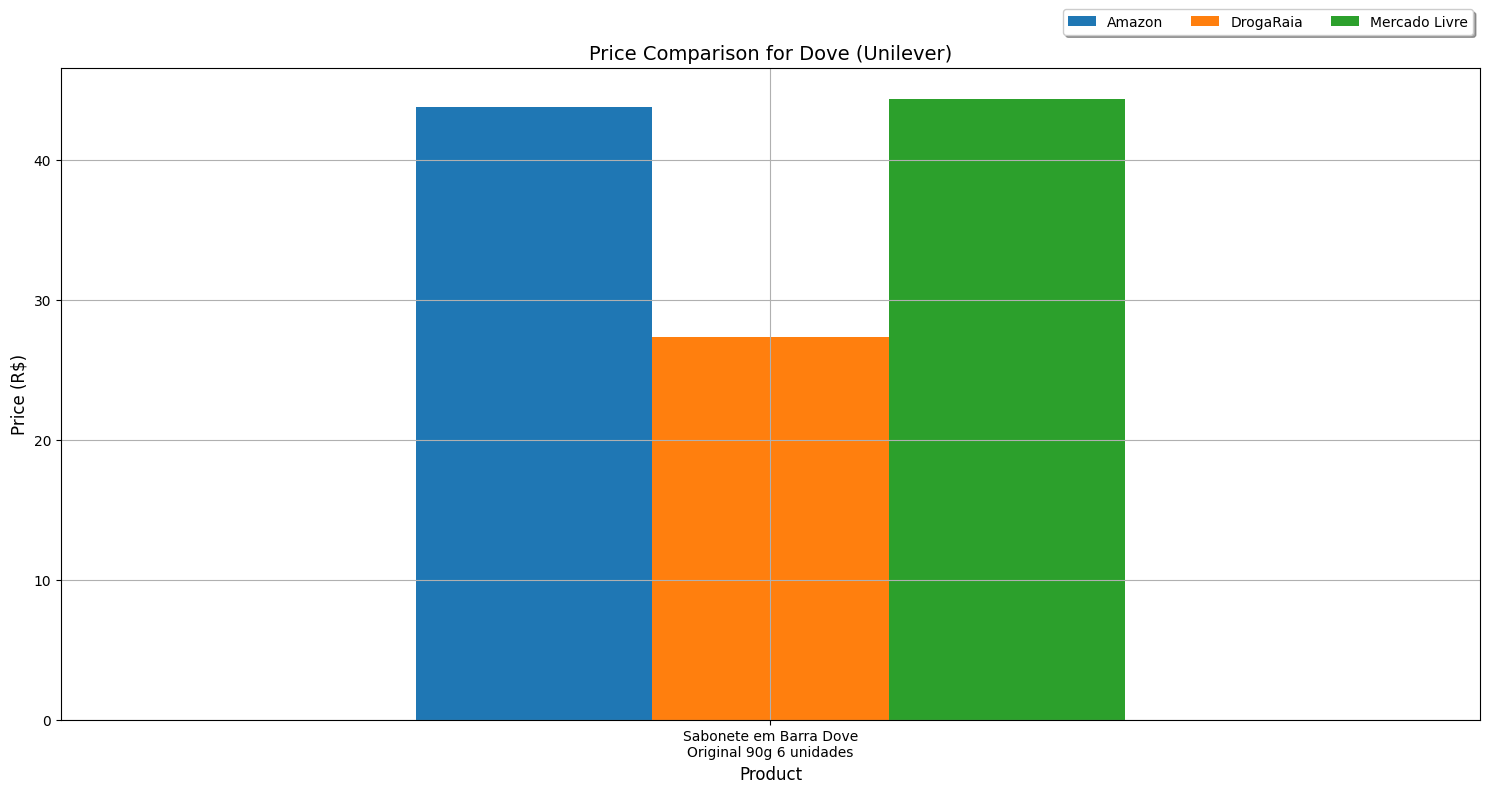

Retailer                                            Amazon  DrogaRaia
Product                                                              
Condicionador de Glicerina Baby Dove Hidratação...   14.45      35.47
Refil Sabonete Líquido Baby Dove Hidratação Enr...   16.29      20.92
Sabonete Líquido Baby Dove Hidratação Glicerina...   23.47      25.31
Shampoo Baby Dove Hidratação Enriquecida 400ml       21.71      33.66
Shampoo de Glicerina Baby Dove Hidratação Glice...   18.93      19.58


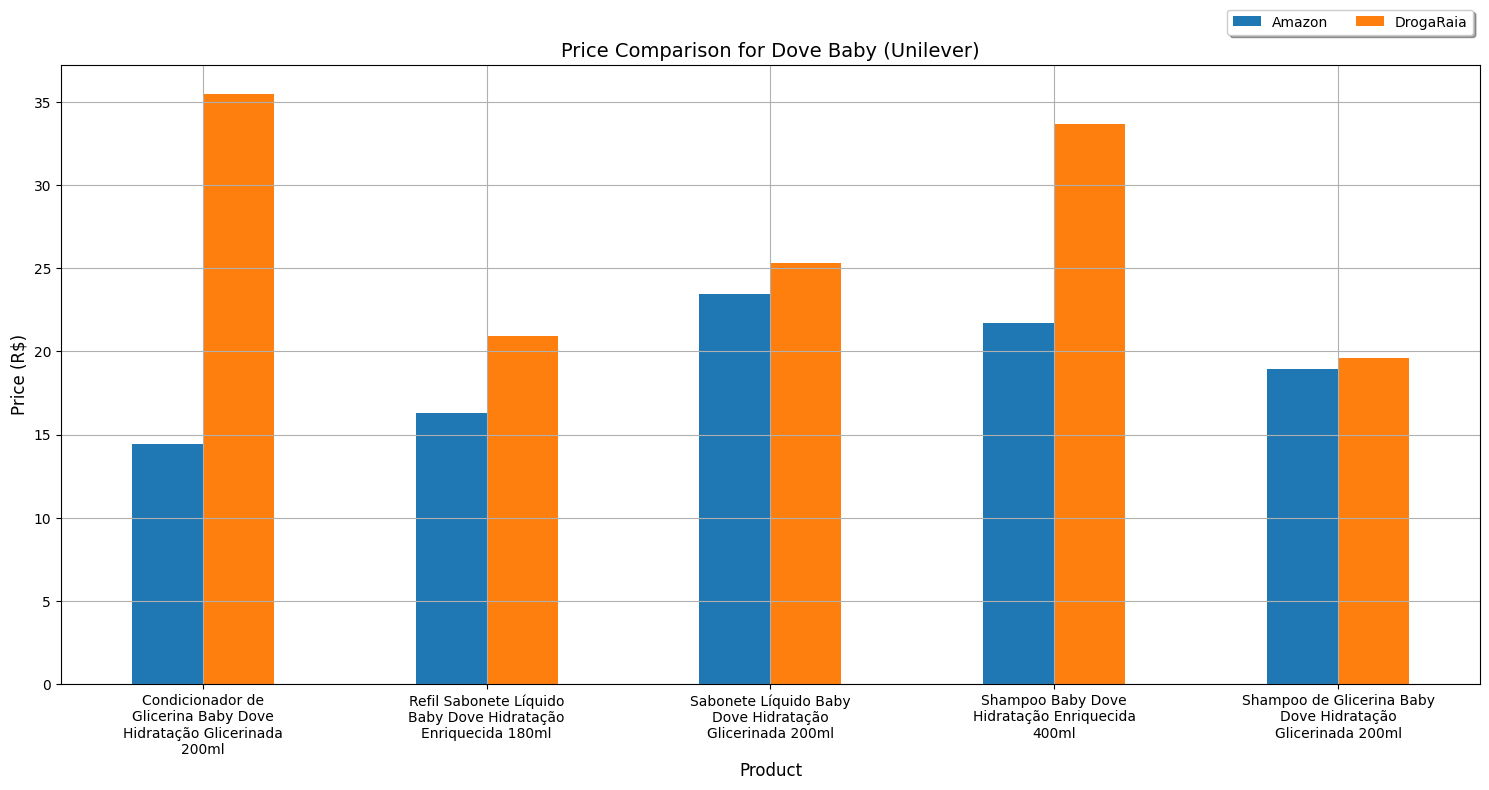

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Retailer                                            Amazon  DrogaRaia
Product                                                              
Condicionador Love Beauty And Planet Energizing...   33.49      50.94
Shampoo Love Beauty And Planet Energizing Detox...   27.34      49.57


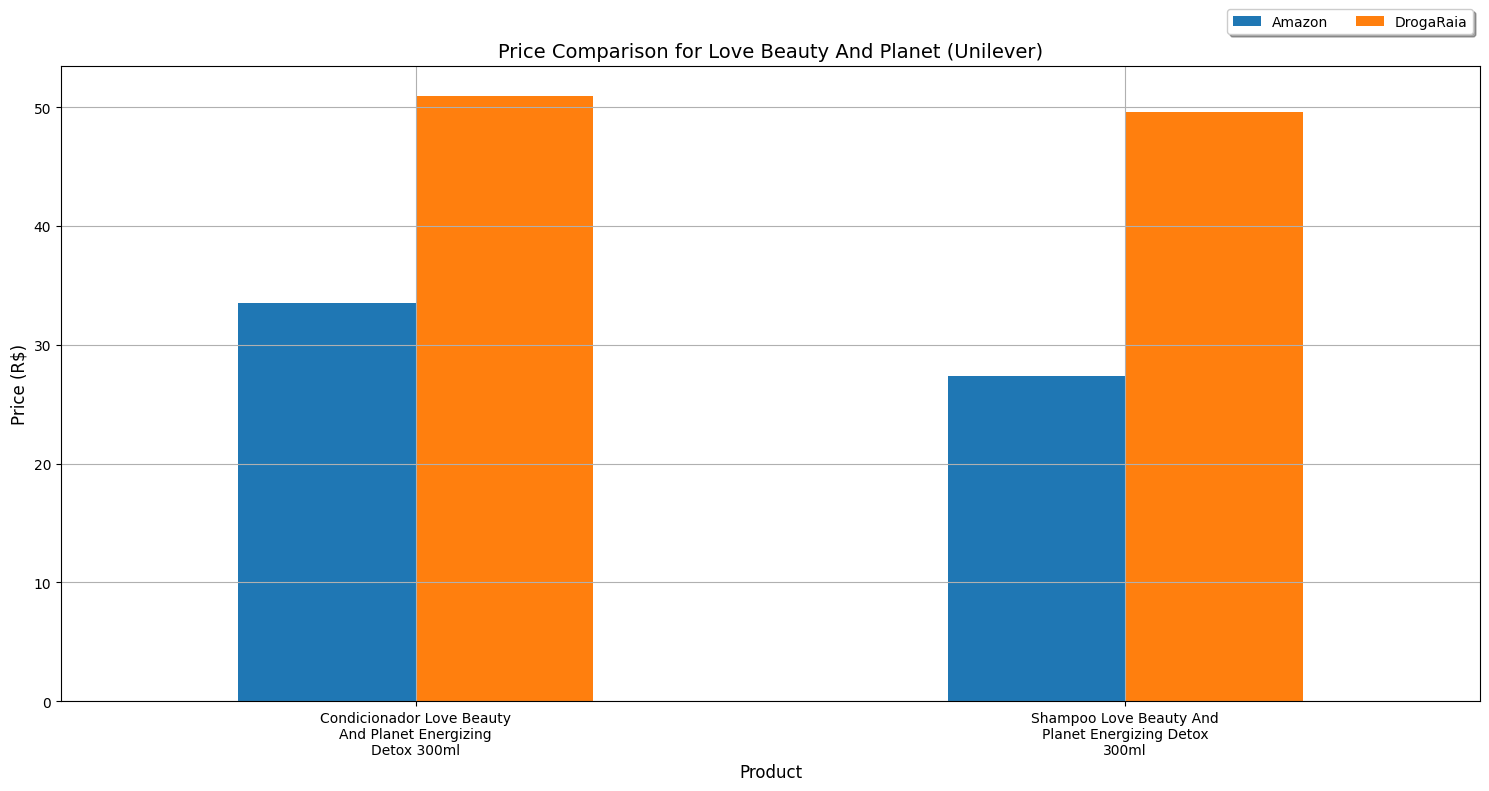

Retailer                                            Amazon  DrogaRaia
Product                                                              
Sabonete em barra Lux Buque de Jasmim 85g 4 uni...    4.39       10.1


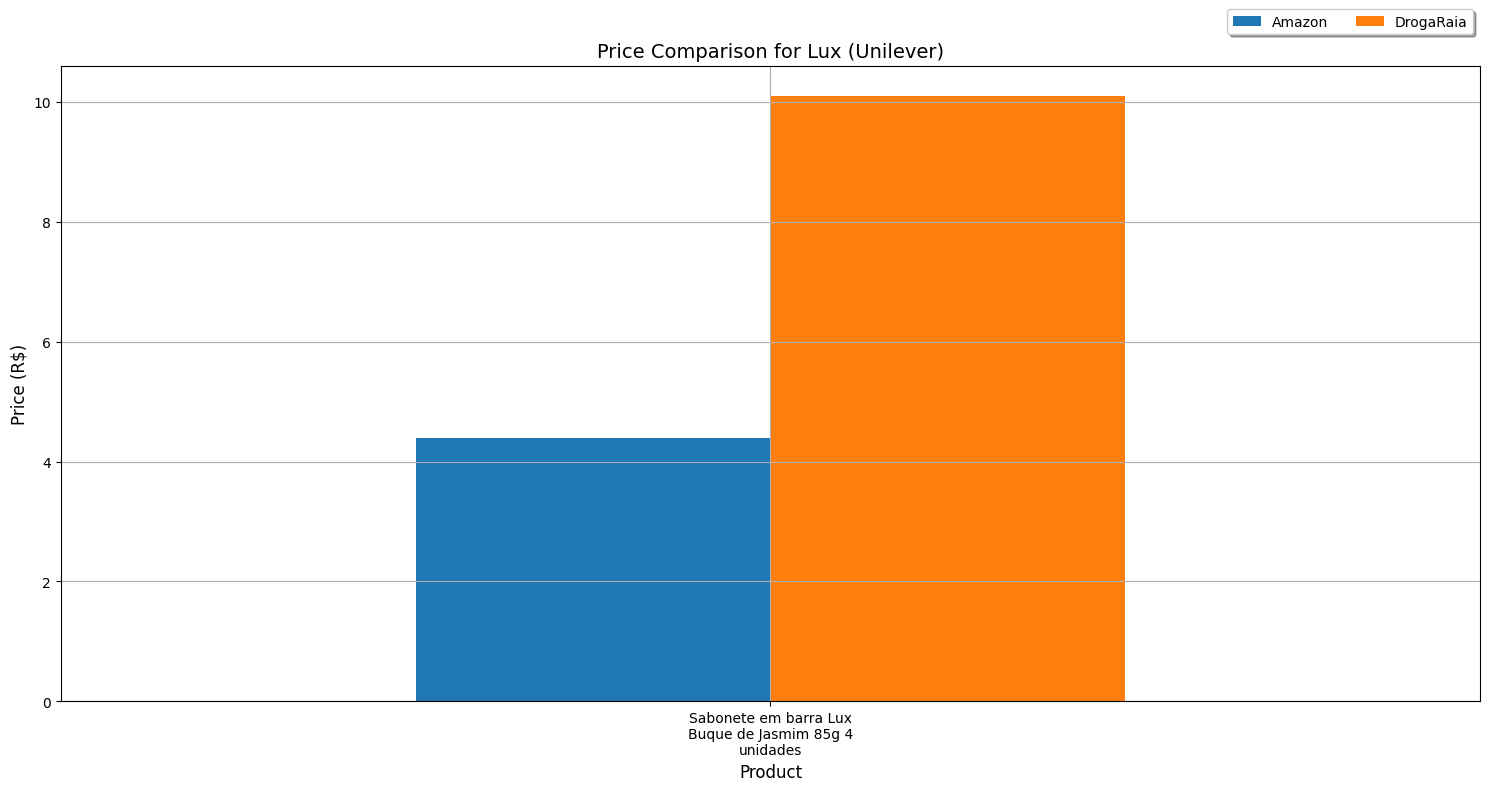

Empty DataFrame
Columns: []
Index: []
Retailer                                  DrogaRaia
Product                                            
Snack Saudável Mãe Terra Remix Cacau 25g       8.41


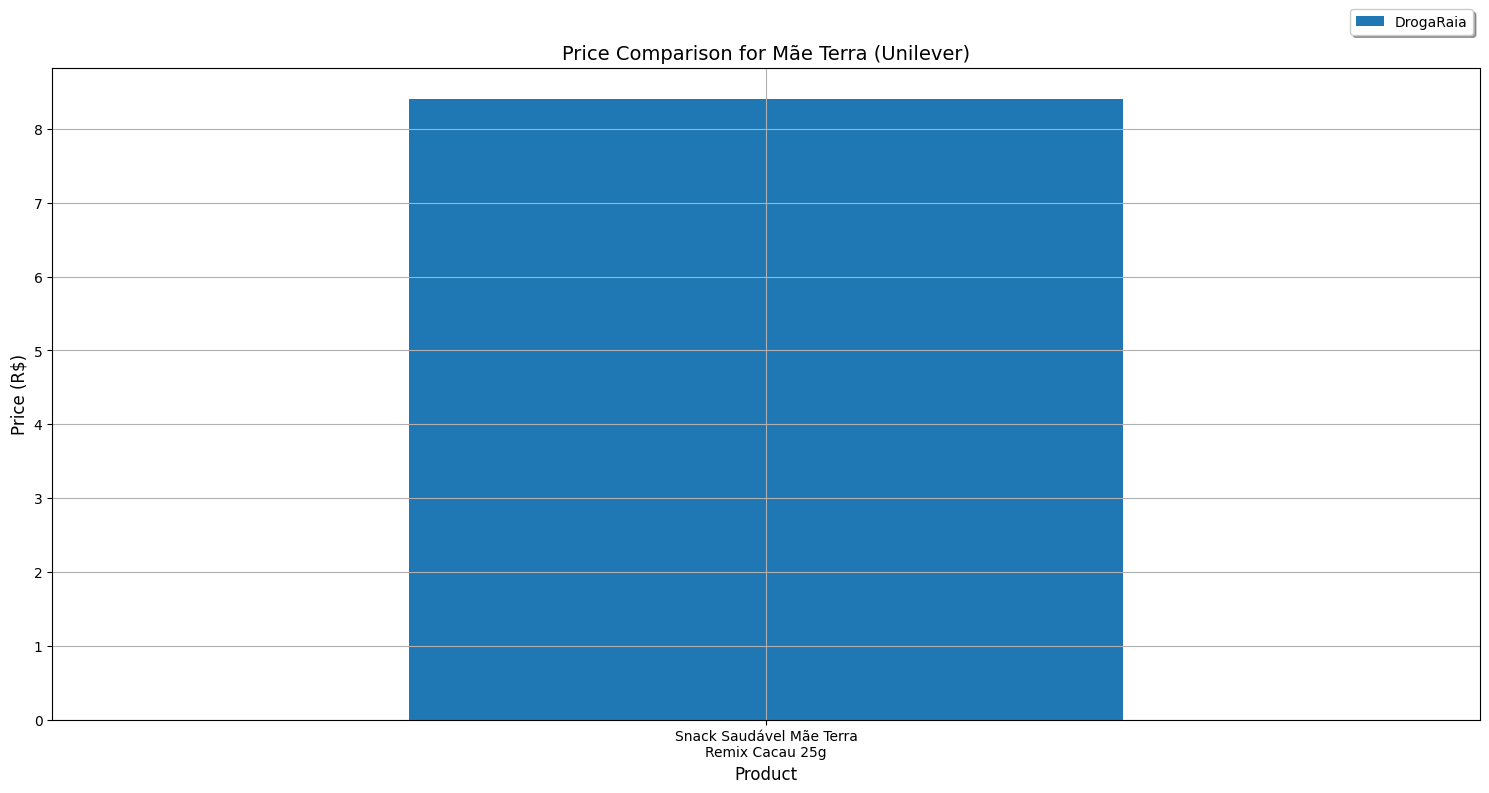

Retailer                                            DrogaRaia
Product                                                      
Condicionador Nexxus Keraphix Queratina e Arroz...      53.92
Shampoo Nexxus Keraphix Queratina e Arroz Negro...      57.44


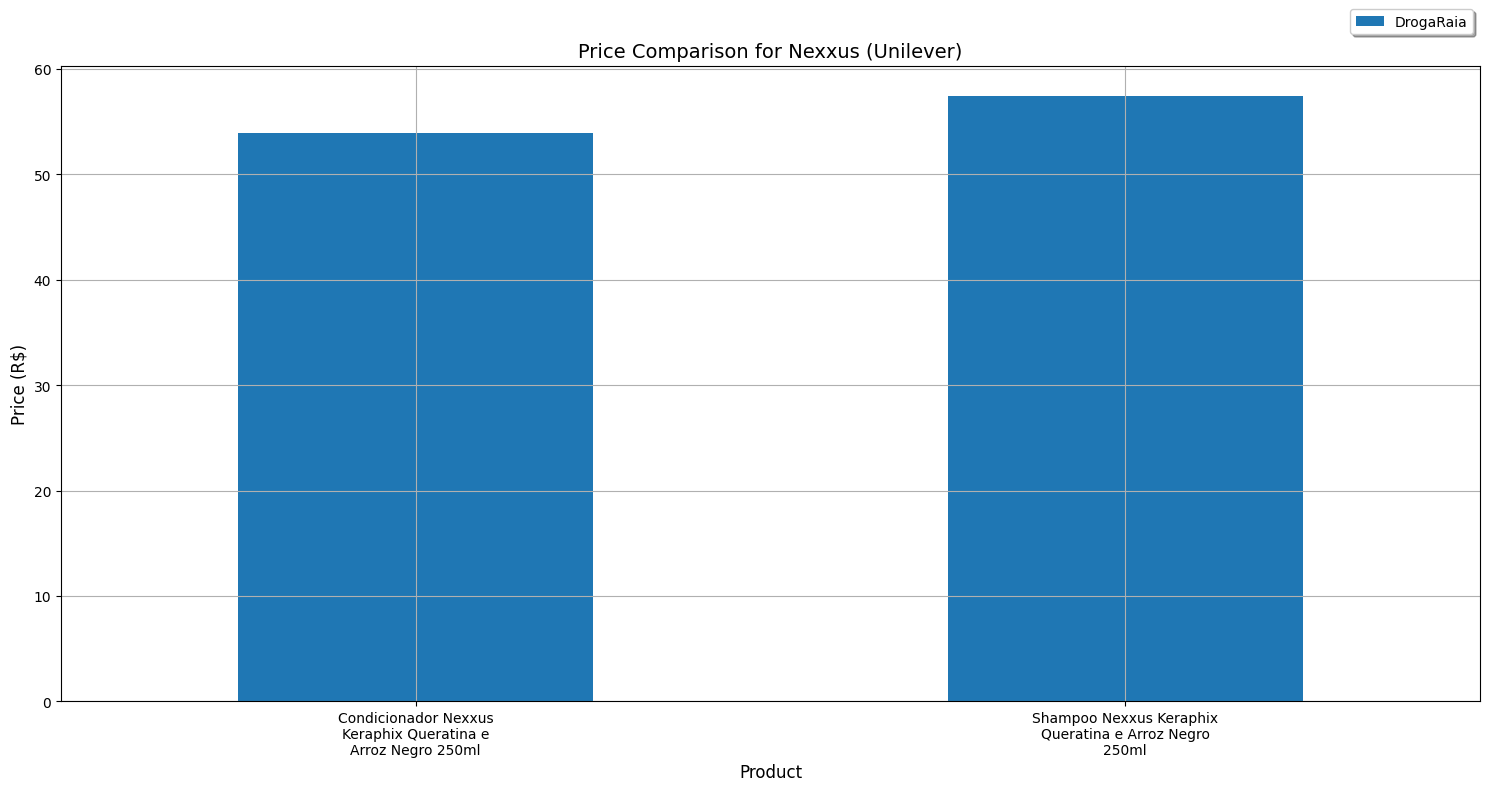

Retailer                               Amazon  Mercado Livre
Product                                                     
Sabão Líquido Omo Lavagem Perfeita 5L   64.29          75.32


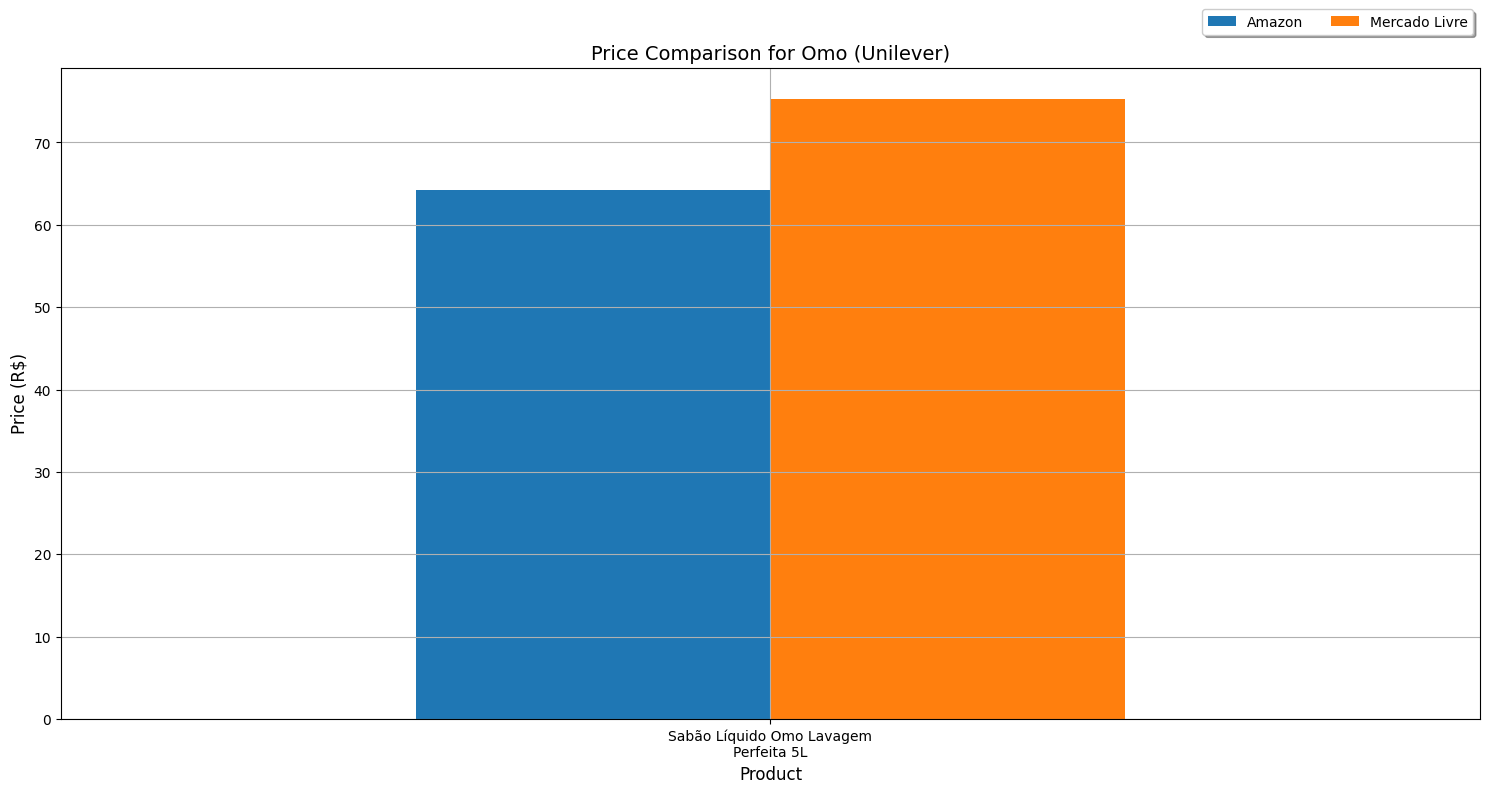

Retailer                                            Amazon  DrogaRaia  \
Product                                                                 
Sabonete em Barra Rexona Antibacterial Limpeza ...    4.38       2.64   

Retailer                                            Mercado Livre  
Product                                                            
Sabonete em Barra Rexona Antibacterial Limpeza ...           2.74  


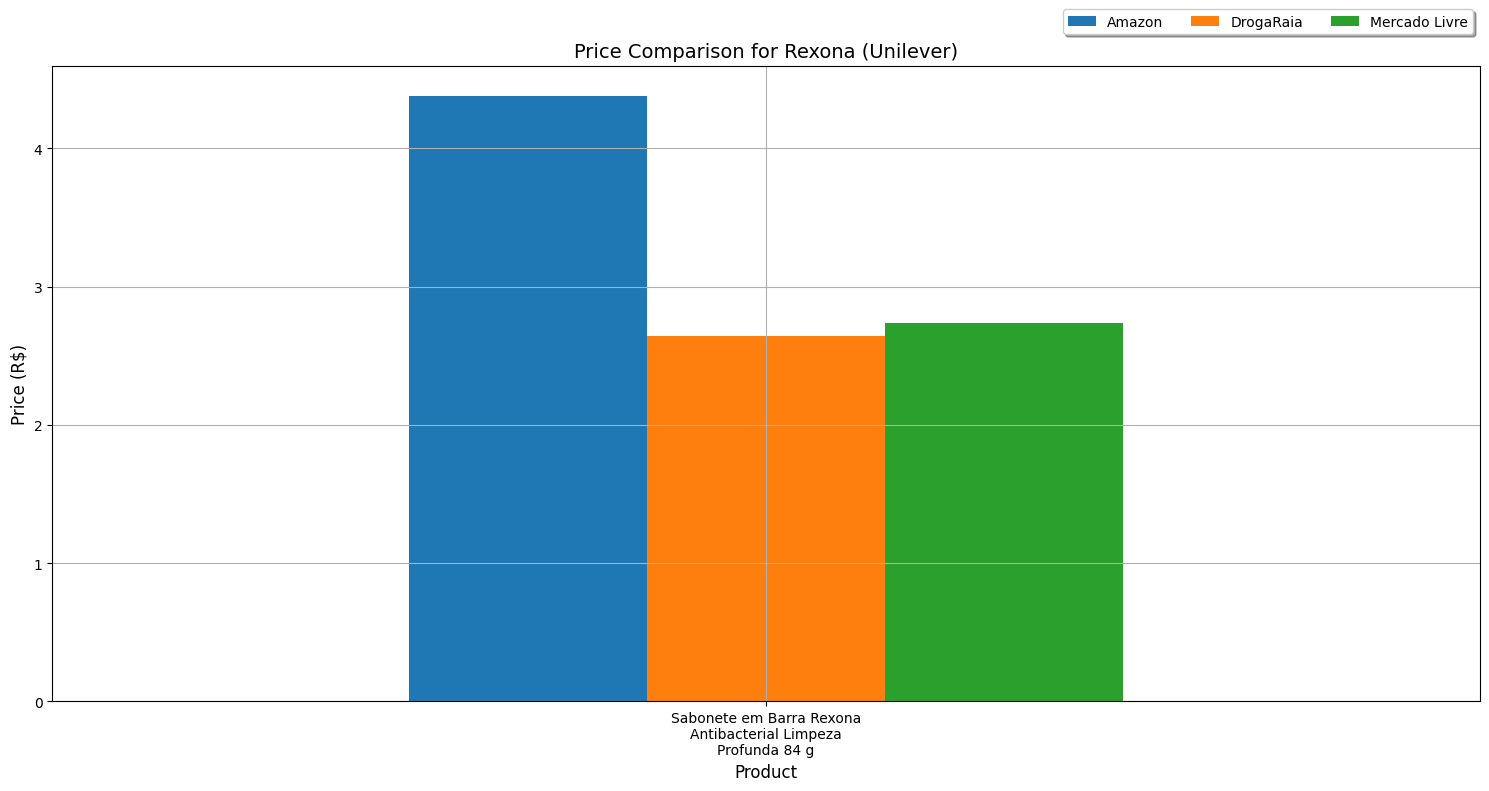

Retailer                                            Amazon  DrogaRaia
Product                                                              
Shampoo Seda By Niina Secrets Água Micelar + Hi...   15.01      15.99
Shampoo Seda By Rayza Babosa + Óleos 325ml           14.71      15.27
Shampoo Seda Ceramidas 325ml                         12.29      14.15
Tratamento Condicionador Seda Ceramidas 325ml        16.42      20.00


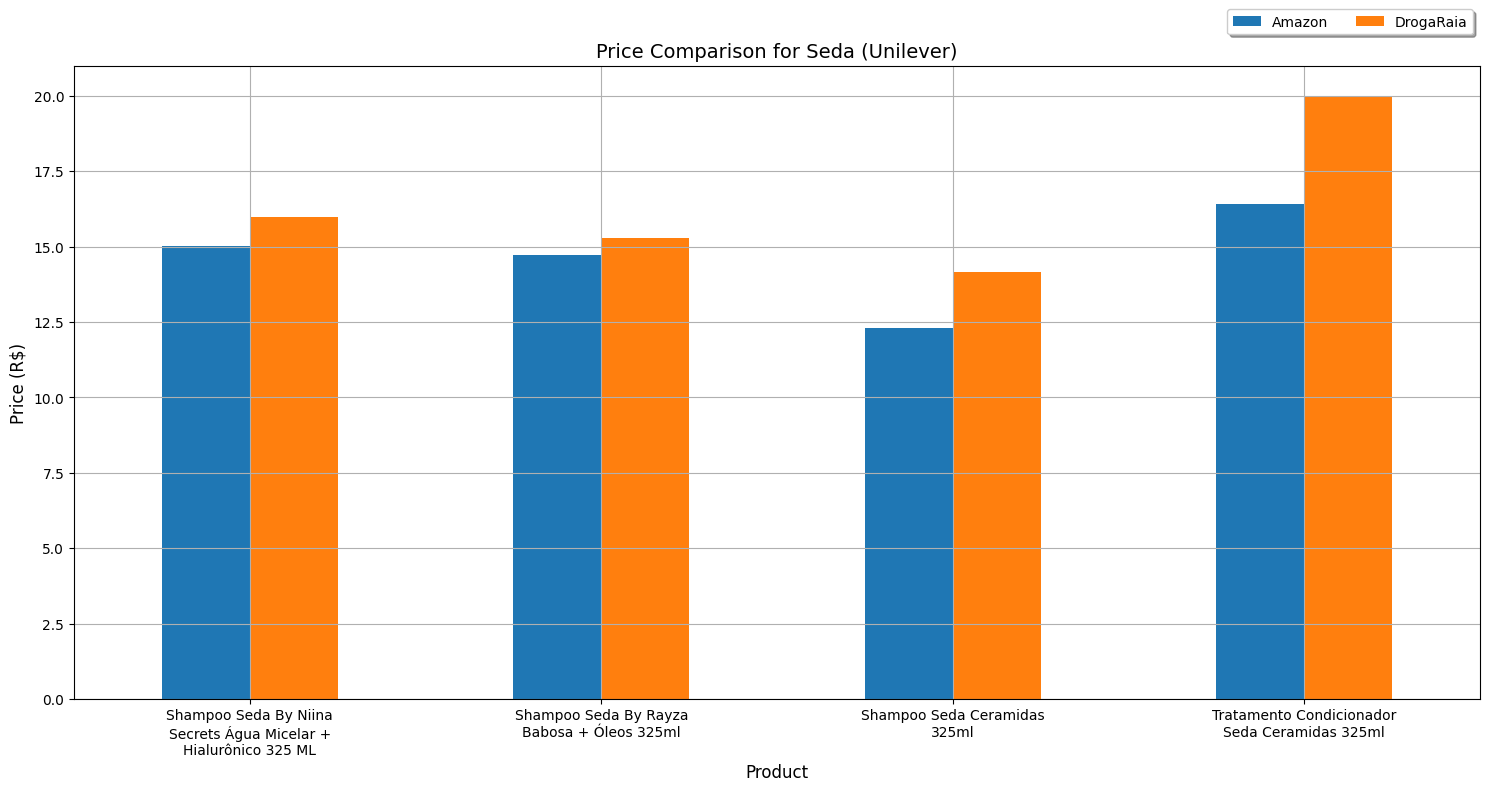

Retailer                                            Amazon  DrogaRaia
Product                                                              
Condicionador TRESemmé Hidratação Profunda 400ml     19.47      30.66
Condicionador TRESemmé Reconstrução e Força 400ml    33.69      31.07
Shampoo TRESemmé Detox Capilar 400 ml                15.50      25.89
Shampoo TRESemmé Reconstrução e Força cabelos m...   14.40      32.87


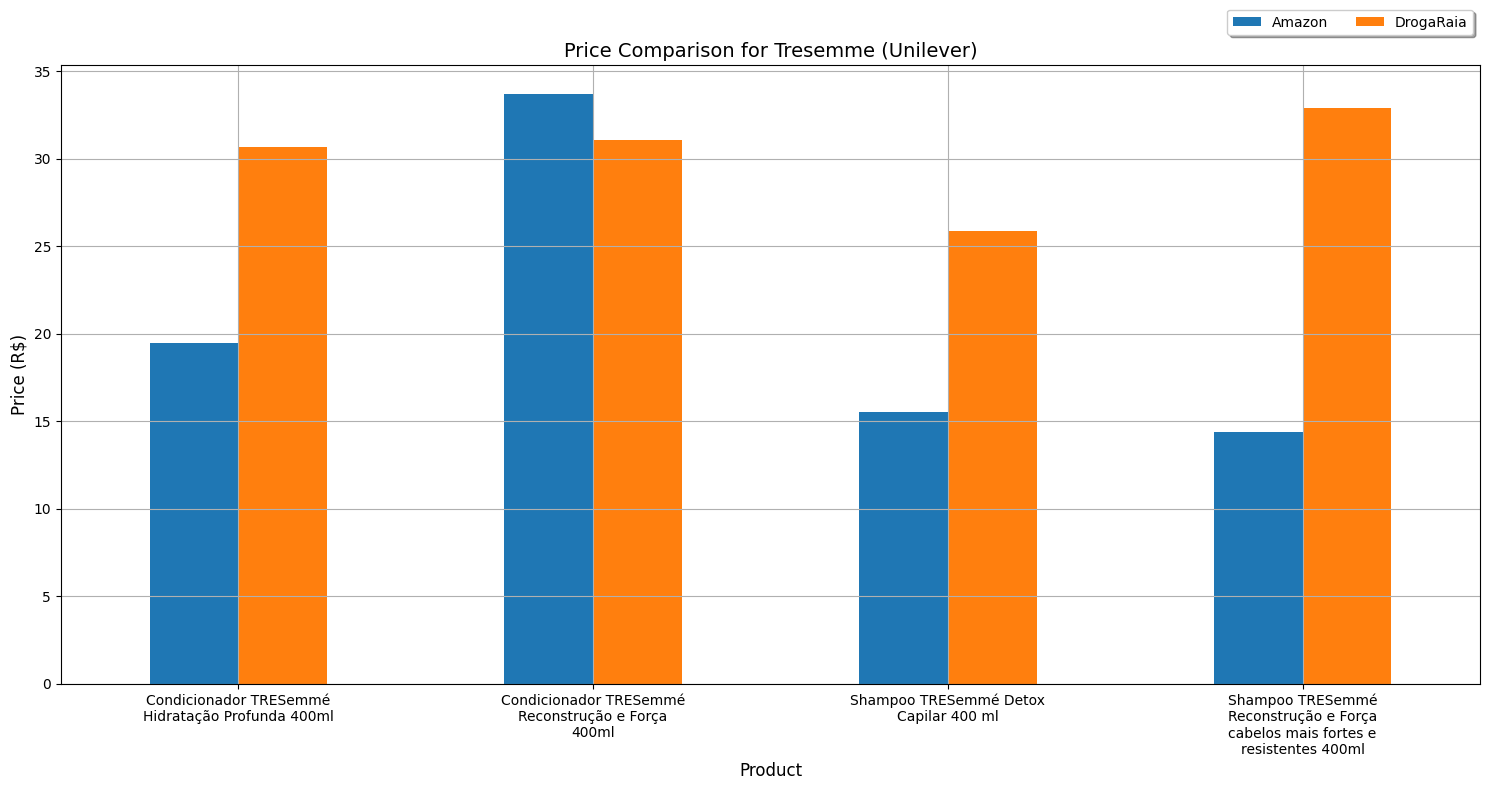

Empty DataFrame
Columns: []
Index: []
Retailer                      Amazon  Mercado Livre
Product                                            
Cloro Gel Vim Lavanda 700ml    12.72          17.49
Cloro Gel Vim Original 700ml   12.72          20.46


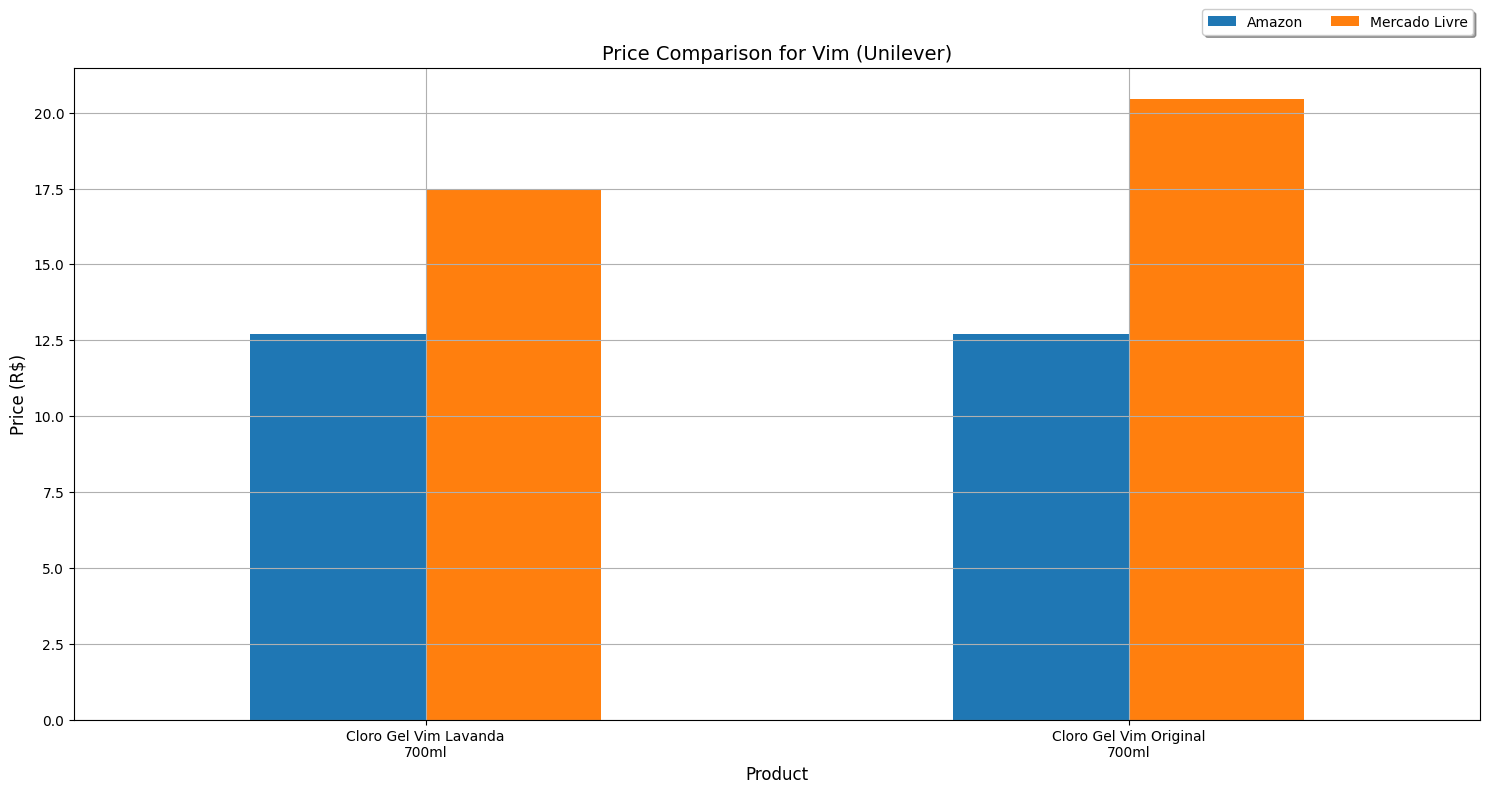

In [119]:
# Customer Price Analysis
selected_customer = 'Unilever'
selected_retailer = ['Amazon', 'DrogaRaia', 'Drogasil', 'Mercado Livre']
#selected_retailer = pd.unique()

df_join1 = df_prod.merge(right = df_coletas, how='inner',\
                    on = 'MasterKey_RetailerProduct').groupby(\
                        ["Customer","Specifics", "Competitor","Brand", "EAN", "Product", "Retailer"]\
                            ).mean()[["SuggestedPrice","FinalPrice"]]
df_join1["FinalPrice"] = np.round(df_join1["FinalPrice"].values,decimals = 2)
df_join1.reset_index(inplace = True)
df_join1

df_selected_customer = df_join1[(df_join1["Customer"] == selected_customer)&(df_join1["Competitor"] == 0)]

for brand in pd.unique(df_selected_customer["Brand"]):
    df_selected_brand = df_selected_customer[df_selected_customer["Brand"] == brand]
    
    # Group by EAN and Retailer, calculate mean price
    ean_retailer_prices = df_selected_brand.groupby(['EAN', 'Retailer','Product'])['FinalPrice'].mean().reset_index()
    ean_retailer_prices = ean_retailer_prices.merge(right = pd.DataFrame(selected_retailer, columns = ['Retailer']), how = 'inner')


    # Pivot the data for plotting
    pivot_data = ean_retailer_prices.pivot(index='Product', columns='Retailer', values='FinalPrice')
    pivot_data.dropna(inplace = True)
    
    print(pivot_data)

    if not pivot_data.empty:
        # Create a bar chart for each EAN
        #ax = pivot_data.plot(kind='bar')
        ax = pivot_data.plot(kind='bar', figsize=(15, 8))
        ax.set_xlabel('Product', fontsize=12)                                   # Xlabel font and size
        ax.set_ylabel('Price (R$)', fontsize=12)                                     # Ylabel font and size

        ax.set_title(f'Price Comparison for {brand} ({selected_customer})', fontsize=14)

        # Break xlabels into multiple lines using textwrap
        wrapped_xlabels = [textwrap.fill(label, width=25) for label in pivot_data.index]
        
        # Xlabel rotation and position 
        ax.set_xticklabels(wrapped_xlabels, rotation=0, ha='center', fontsize=10)    

        # Position the legend outside the chart
        ax.legend(loc='upper right', 
                bbox_to_anchor=(1.0, 1.1), ncol=3, 
                fancybox=True, shadow=True,fontsize=10)                      # Legend font size

        # Add grid lines to the plot
        ax.grid(True)
        
        
        plt.tight_layout()
        plt.show()

C:\Users\luiza\AppData\Local\Temp\ipykernel_14860\2325389595.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_join2 = df_prod.merge(right = df_coletas, how='inner',\
C:\Users\luiza\AppData\Local\Temp\ipykernel_14860\2325389595.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  pivot_data.columns = pivot_data.columns.str.replace(r'^[A-Za-z]+[0-9]+','')


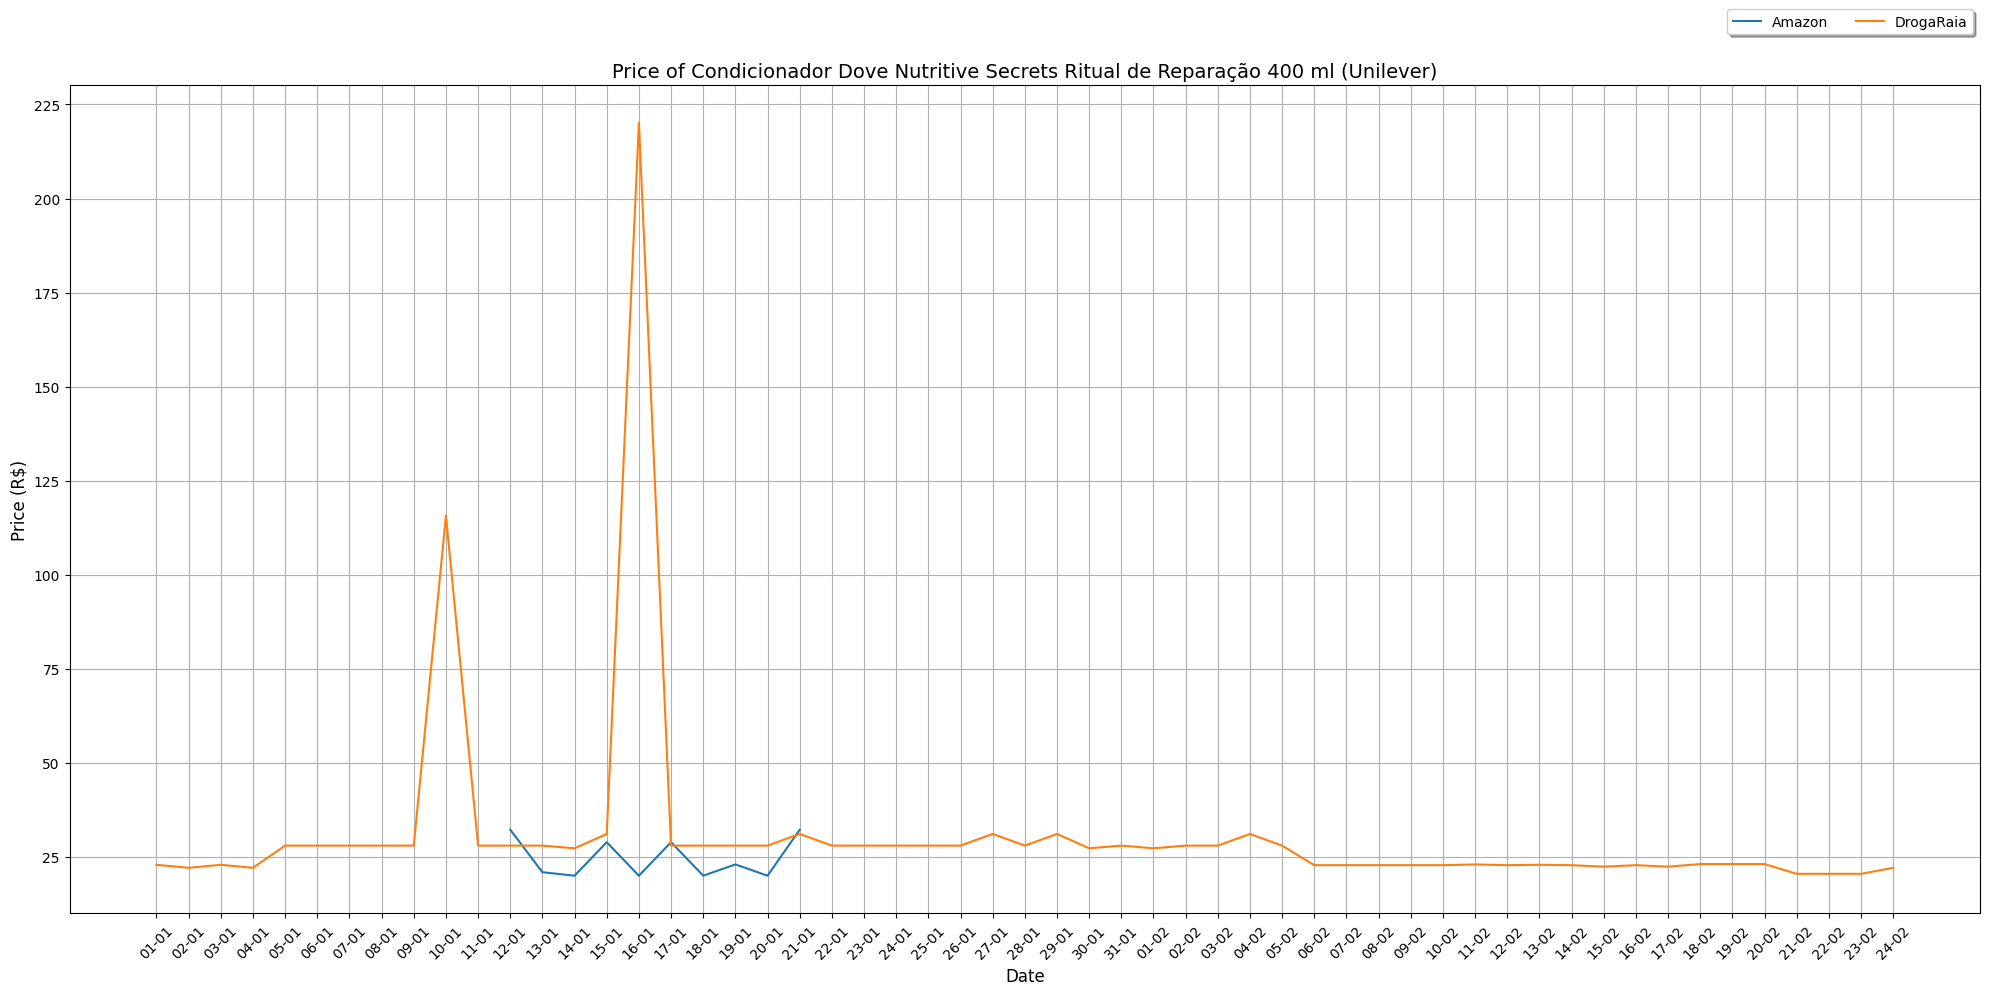

C:\Users\luiza\AppData\Local\Temp\ipykernel_14860\2325389595.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  pivot_data.columns = pivot_data.columns.str.replace(r'^[A-Za-z]+[0-9]+','')


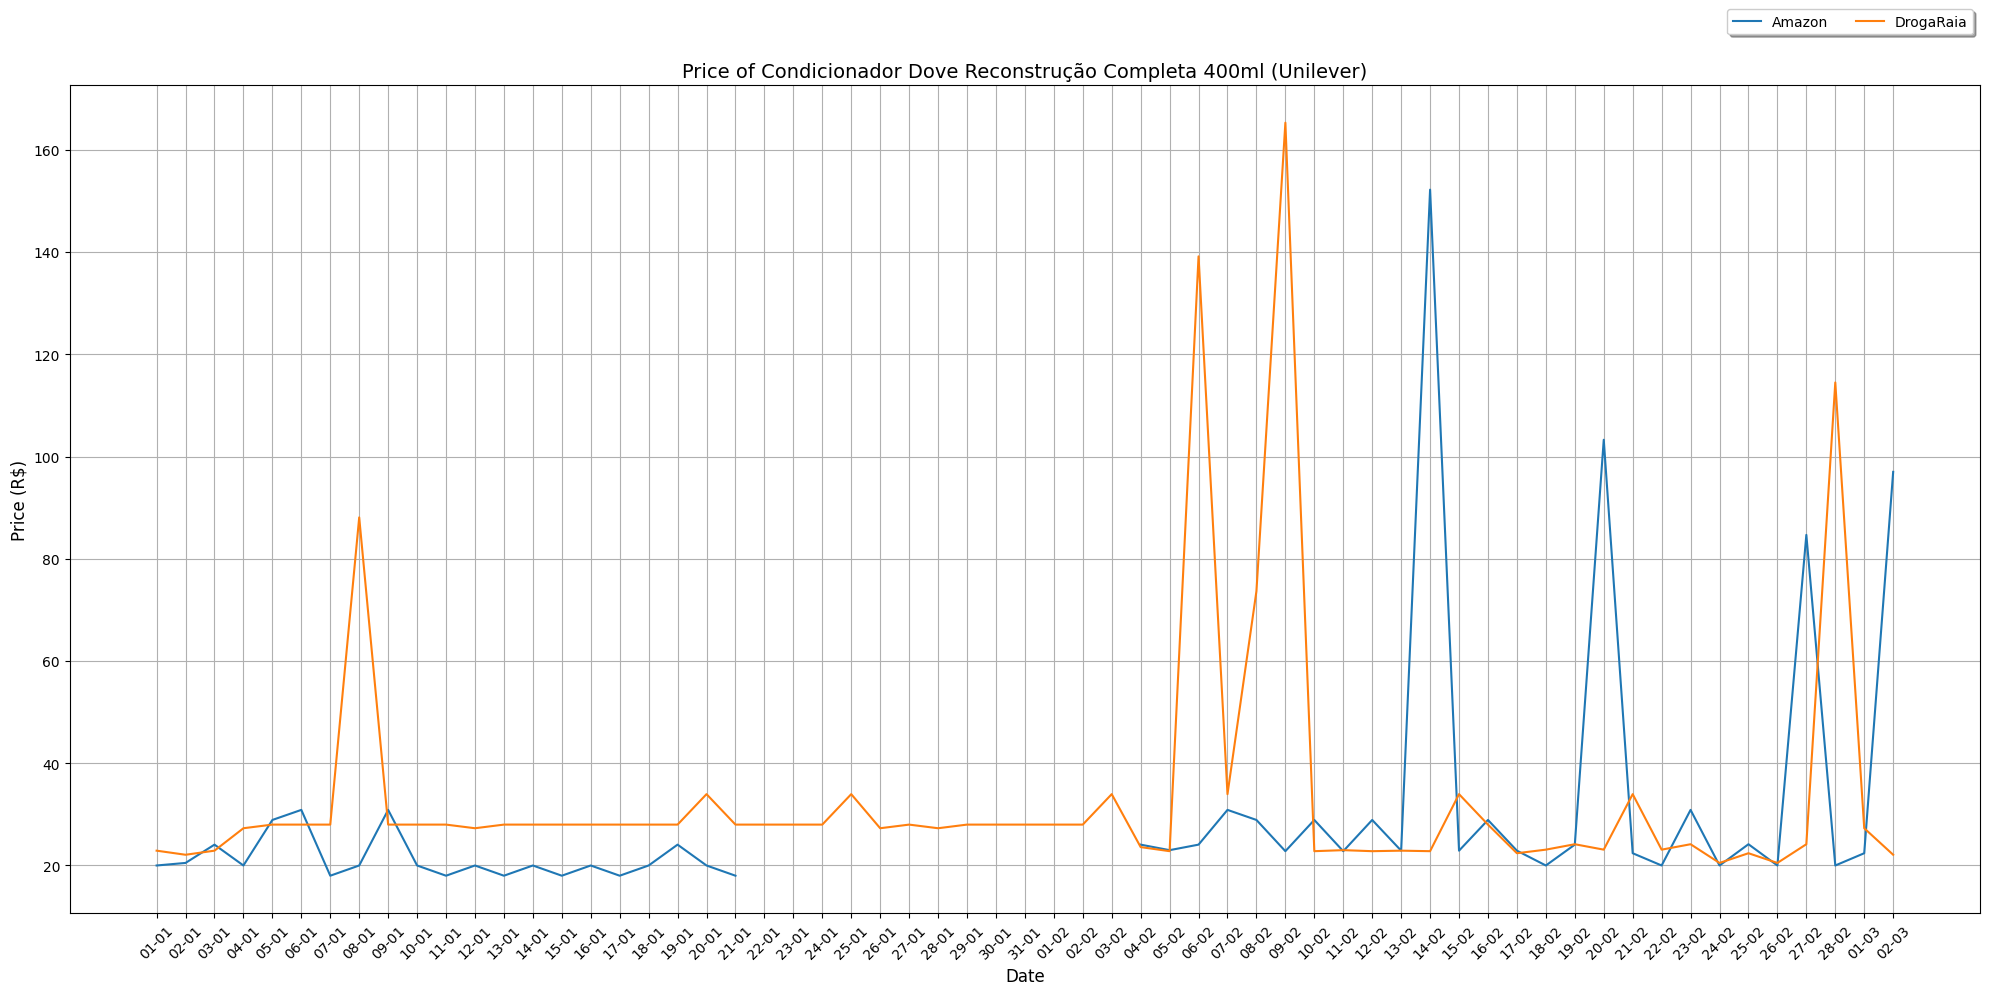

C:\Users\luiza\AppData\Local\Temp\ipykernel_14860\2325389595.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  pivot_data.columns = pivot_data.columns.str.replace(r'^[A-Za-z]+[0-9]+','')


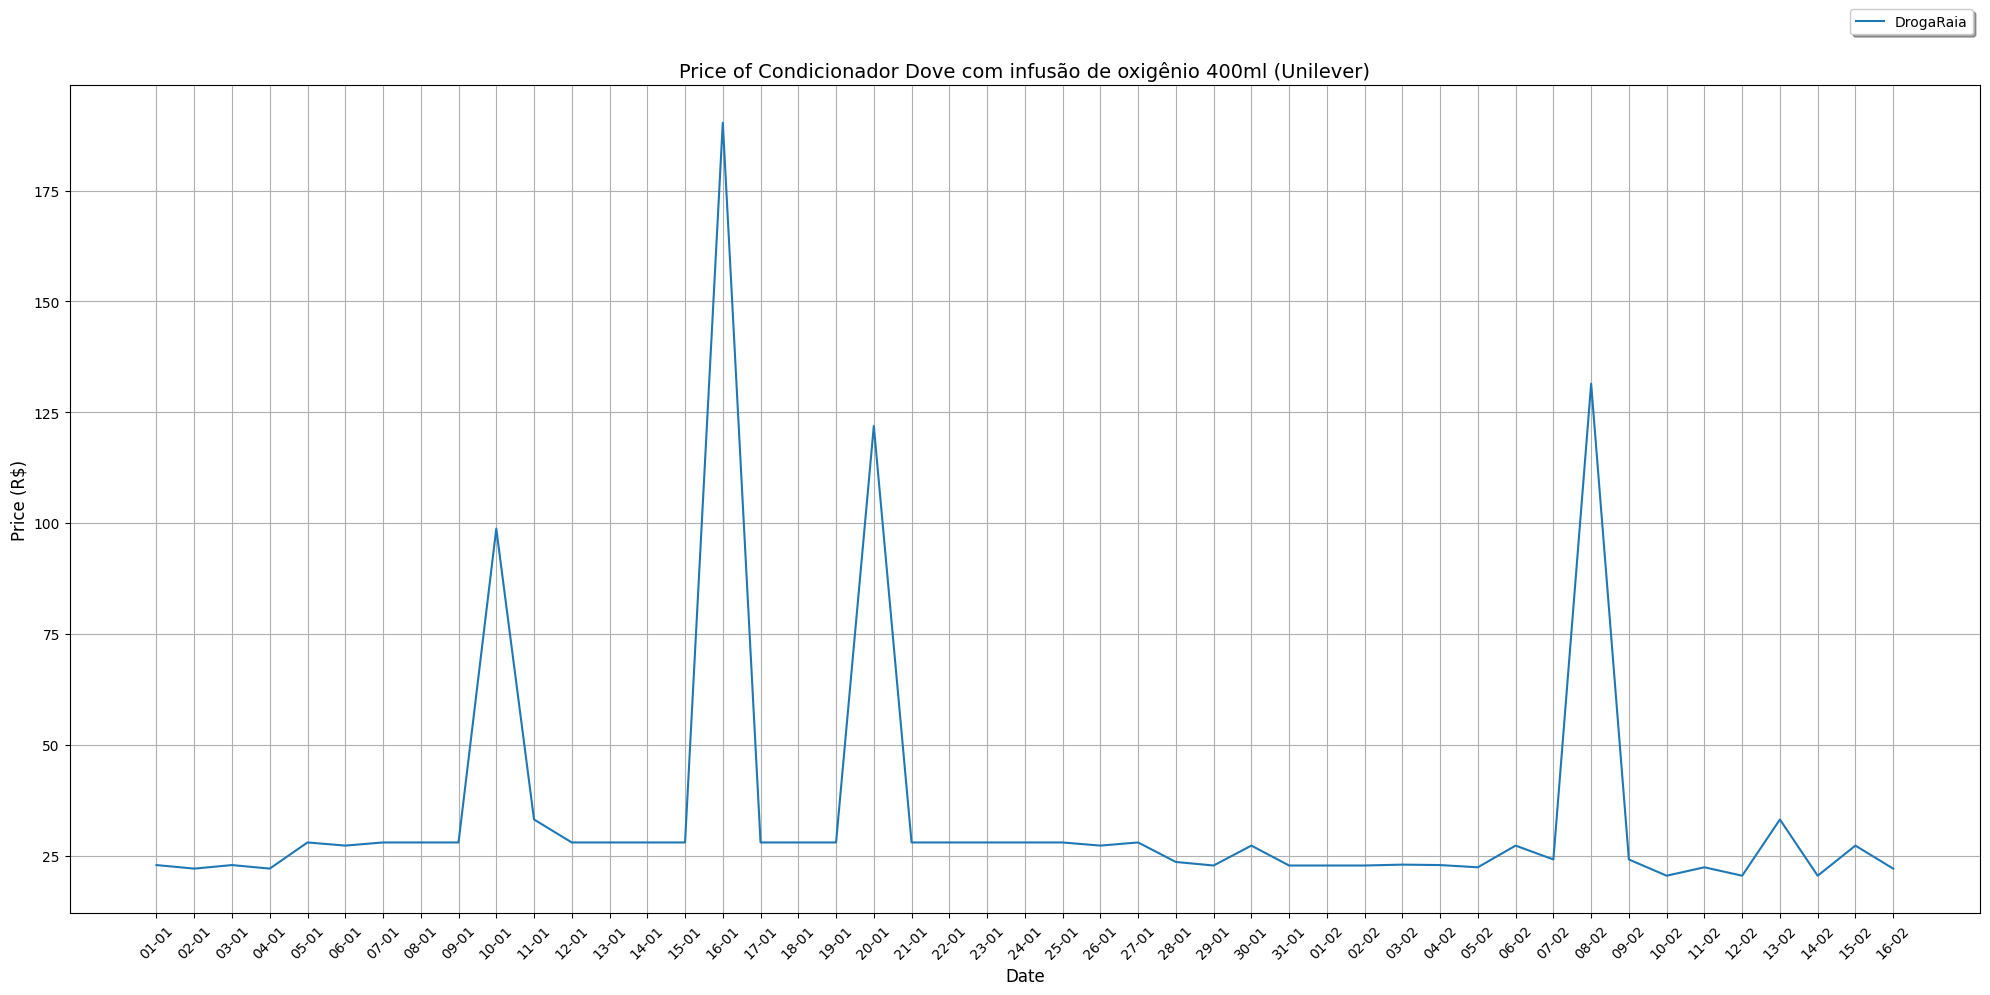

C:\Users\luiza\AppData\Local\Temp\ipykernel_14860\2325389595.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  pivot_data.columns = pivot_data.columns.str.replace(r'^[A-Za-z]+[0-9]+','')


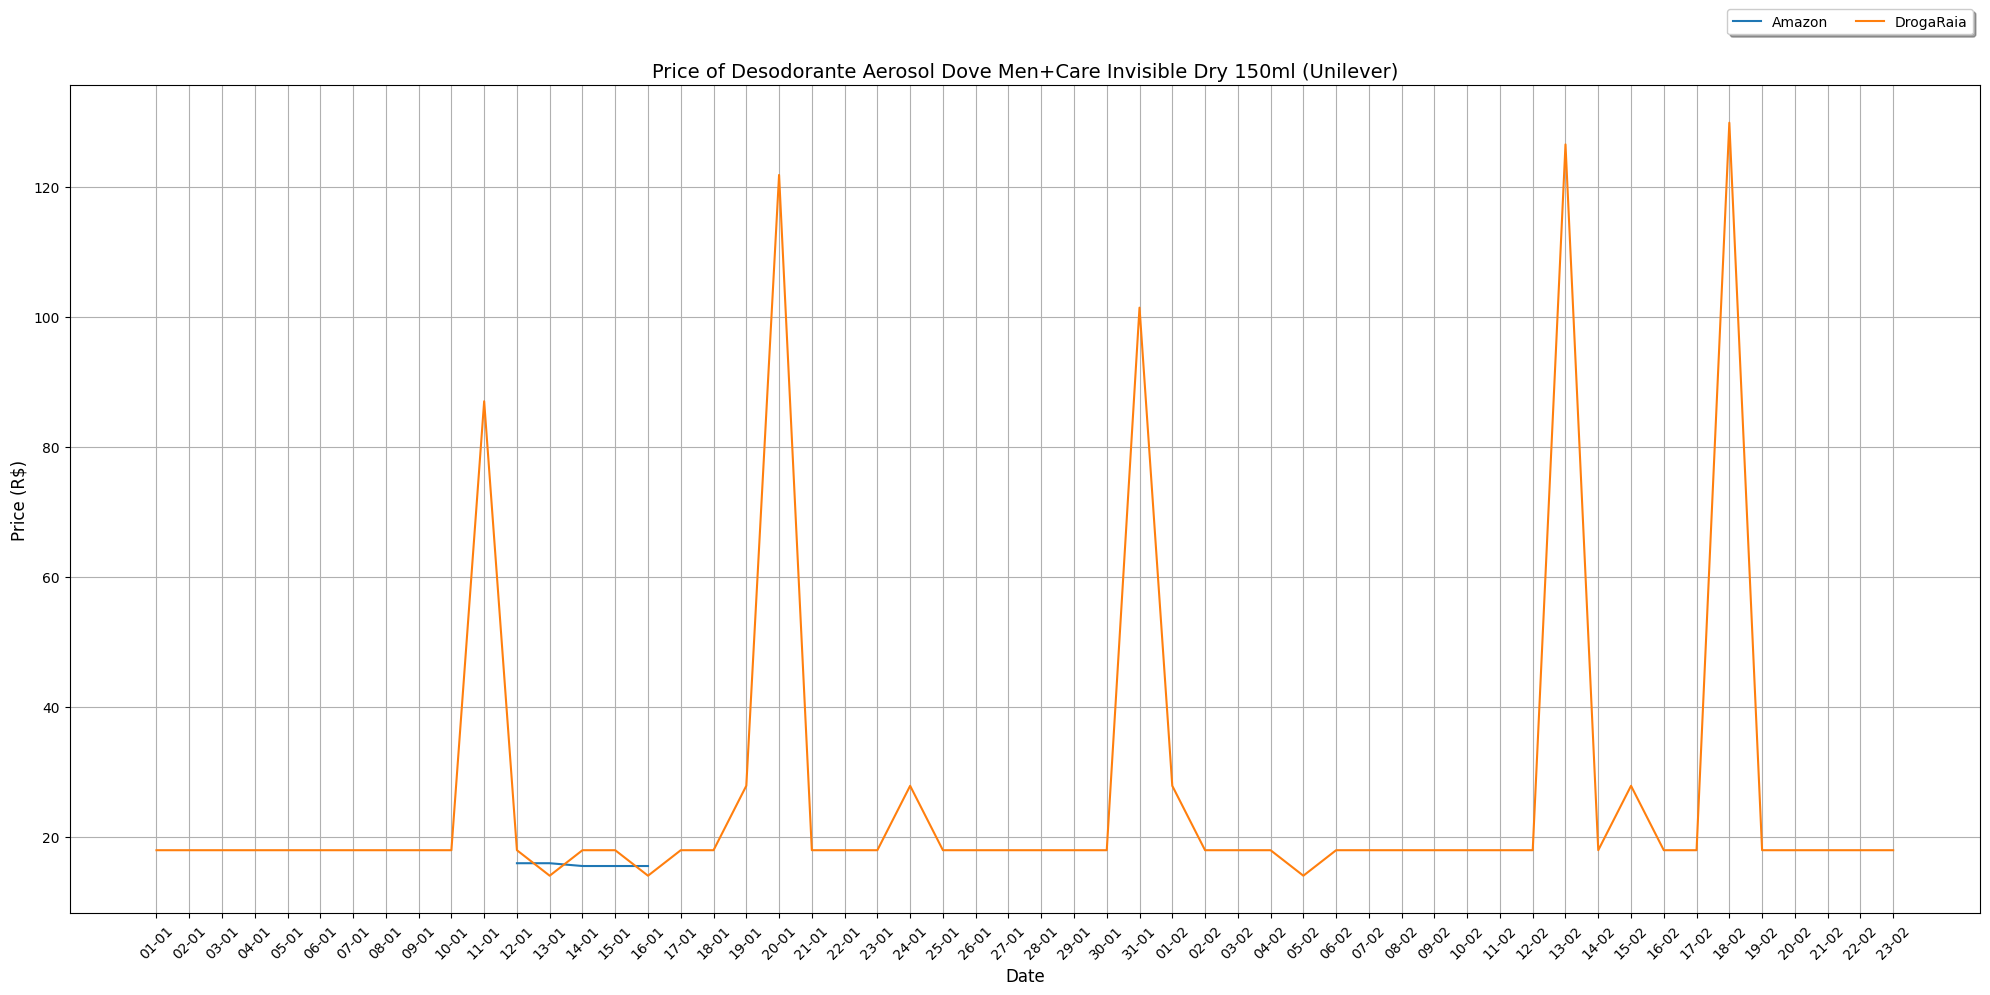

C:\Users\luiza\AppData\Local\Temp\ipykernel_14860\2325389595.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  pivot_data.columns = pivot_data.columns.str.replace(r'^[A-Za-z]+[0-9]+','')


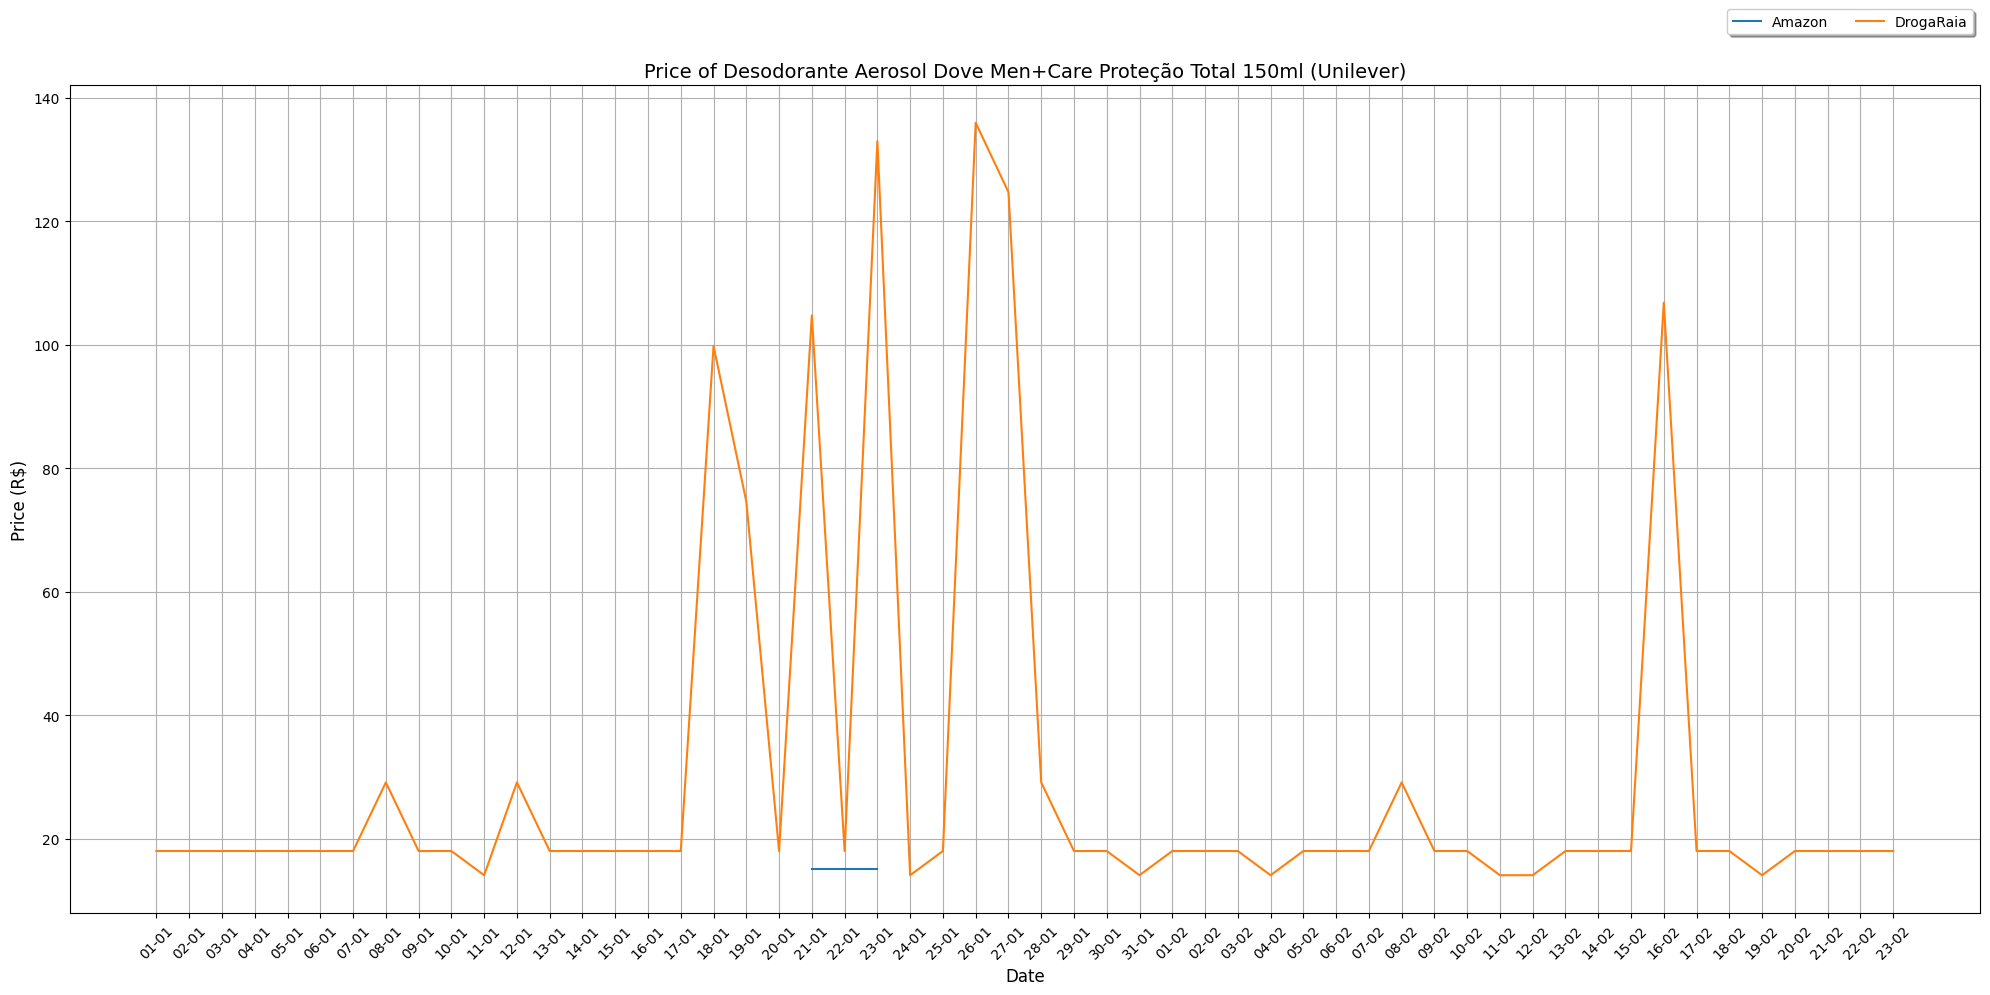

In [120]:
# Customer Price Analysis
selected_customer = 'Unilever'      #--> Customer name 
selected_brand = 'Dove'             #--> Customer associated brand 

selected_retailers = ['Amazon', 'DrogaRaia', 'Drogasil', 'Mercado Livre']   #--> Retailers to be analized 

num_ean = 5                         # --> Number of selected_brand products which prices will be analized

df_join2 = df_prod.merge(right = df_coletas, how='inner',\
                        on = 'MasterKey_RetailerProduct').groupby(\
                                                                ['Customer','Specifics', 'Competitor', 'Product',
                                                                'Brand','EAN','Retailer','MasterKey_RetailerProduct',
                                                                'DateIns'])['FinalPrice','SuggestedPrice'].mean()


df_join2['FinalPrice'] = np.round(df_join2['FinalPrice'].values,decimals = 2)
df_join2.reset_index(inplace = True)

df_selected = df_join2[(df_join2['Customer'] == selected_customer)&
                                (df_join2['Brand'] == selected_brand)&
                                (df_join2['Competitor'] == 0)]


for ean in pd.unique(df_selected['EAN'])[0:num_ean]:
    df_ean = df_selected[df_selected['EAN'] == ean]
    prod = pd.unique(df_ean['Product'].values)[0]
    
    # Group by EAN and Retailer, calculate mean price
    ean_retailer_prices = df_ean.groupby(['MasterKey_RetailerProduct', 'Retailer',
                                        'DateIns'])['FinalPrice'].mean().reset_index()
    ean_retailer_prices = ean_retailer_prices.merge(right = pd.DataFrame(selected_retailer, columns = ['Retailer']), how = 'inner')
    
    # Pivot the data for plotting
    pivot_data = ean_retailer_prices.pivot(index='DateIns', columns='MasterKey_RetailerProduct', values='FinalPrice')
    pivot_data.columns = pivot_data.columns.str.replace(r'^[A-Za-z]+[0-9]+','')

    if not pivot_data.empty:
        # Create a chart
        fig, ax = plt.subplots(figsize=(20,10))


        for retailer in pd.unique(pivot_data.columns):
            ax.plot(pivot_data.index, pivot_data[retailer], label=retailer)

        ax.set_xlabel('Date', fontsize=12)                                      # Xlabel font and size
        ax.set_ylabel('Price (R$)', fontsize=12)                                     # Ylabel font and size

        ax.set_title(f'Price of {prod} ({selected_customer})', fontsize=14)

        # xlabels datetime formatting
        date_formatter = DateFormatter('%d-%m')  # Define the desired format
        ax.xaxis.set_major_formatter(date_formatter)
        plt.xticks(rotation=45, ha='center', fontsize=10)                         # Xlabel rotation and position   

        ax.legend(loc='upper right', 
                bbox_to_anchor=(1.0, 1.1), ncol=3, 
                fancybox=True, shadow=True,fontsize=10)                      # Legend font size                                                 # Legend font size
    
        # Add grid lines to the plot
        ax.grid(True)

        plt.tight_layout()
        plt.show()


C:\Users\luiza\AppData\Local\Temp\ipykernel_14860\2881460370.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_join3 = df_prod.merge(right = df_coletas, how='inner',\


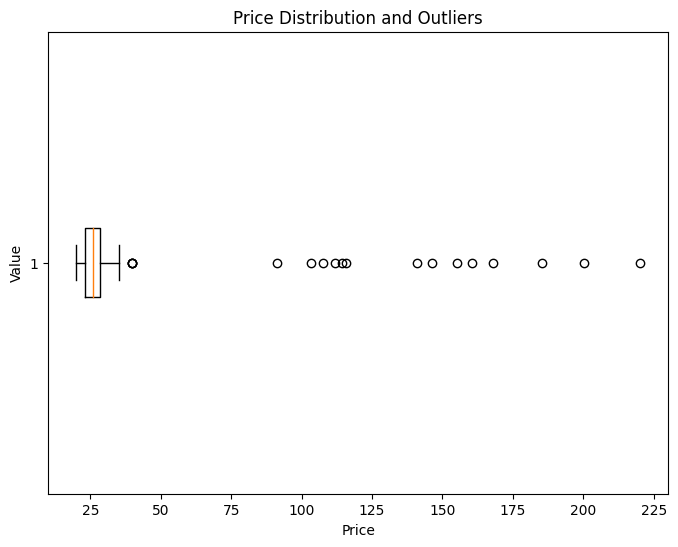

Descriptive Statistics:
Mean: 35.16229050279329
Median: 25.99
Standard Deviation: 33.85414335428106
Min: 19.99
Max: 220.15

Outliers:
30     115.69
36     220.15
85     200.42
92     160.55
100    146.35
115    114.32
134     91.15
136     39.72
137    155.02
138    112.00
147     39.72
155    141.14
156     39.72
158    103.37
161    107.76
172    167.97
174    185.32
175     39.72
dtype: float64


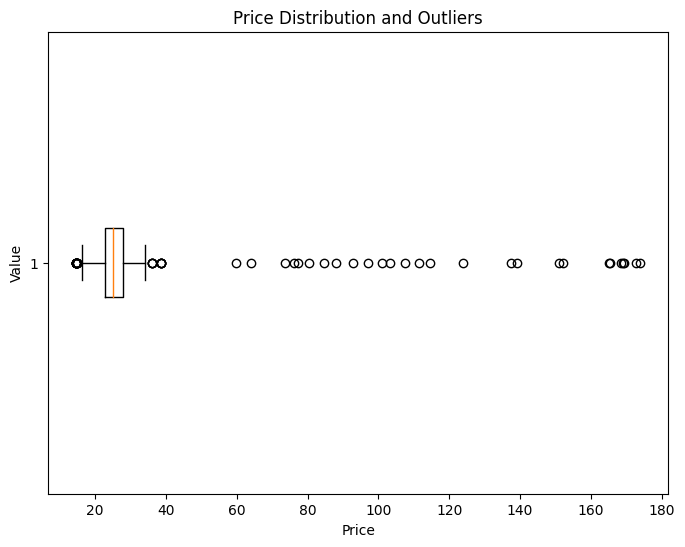

Descriptive Statistics:
Mean: 31.440592783505156
Median: 25.02
Standard Deviation: 26.3620917327562
Min: 14.69
Max: 173.85

Outliers:
21      77.33
37     152.23
43     103.29
50      84.68
53      97.01
61      88.10
90     139.18
92      73.66
93     165.33
112    114.50
121    169.29
139    111.52
144    169.12
174    137.31
176     38.65
181    123.74
188    173.85
196     38.65
199     38.65
207     38.65
210    100.90
211     38.65
223     36.09
233    150.88
234     36.09
235     36.09
238     36.09
246    165.18
252    168.36
274    172.78
328     80.51
342     14.92
344     14.92
346     14.92
348     14.92
350     59.89
351     14.69
352     14.92
365     92.82
366     63.92
368     14.69
369     76.06
372     14.69
374     14.69
376     14.69
378     14.69
379    107.61
380     14.69
382     14.69
384     14.69
dtype: float64


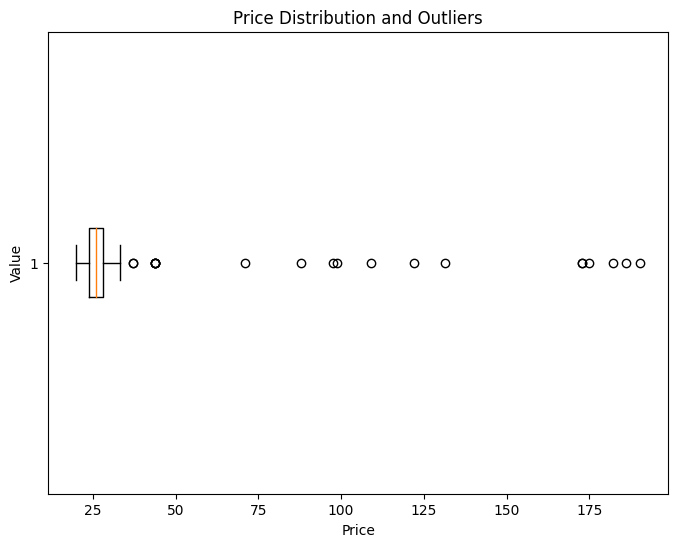

Descriptive Statistics:
Mean: 36.51309859154929
Median: 25.99
Standard Deviation: 35.02273219599636
Min: 19.99
Max: 190.31

Outliers:
9       98.75
15     190.31
19     121.90
38     131.44
48      43.75
49      43.75
56      43.75
58      87.97
73     109.18
75      97.54
81     182.18
83      43.75
85      43.75
117    174.84
118     70.90
121     37.03
124    172.72
130     37.03
135    186.22
141    172.87
dtype: float64


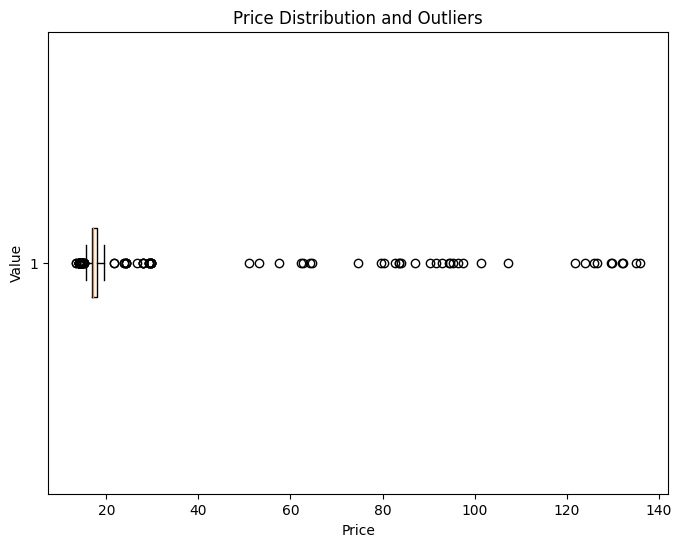

Descriptive Statistics:
Mean: 24.579287531806614
Median: 17.13
Standard Deviation: 23.46699438597756
Min: 13.49
Max: 135.9

Outliers:
7      14.79
8      14.79
9      14.79
10     15.10
11     79.71
       ...  
358    64.24
369    21.65
375    62.30
377    80.36
386    14.00
Length: 93, dtype: float64


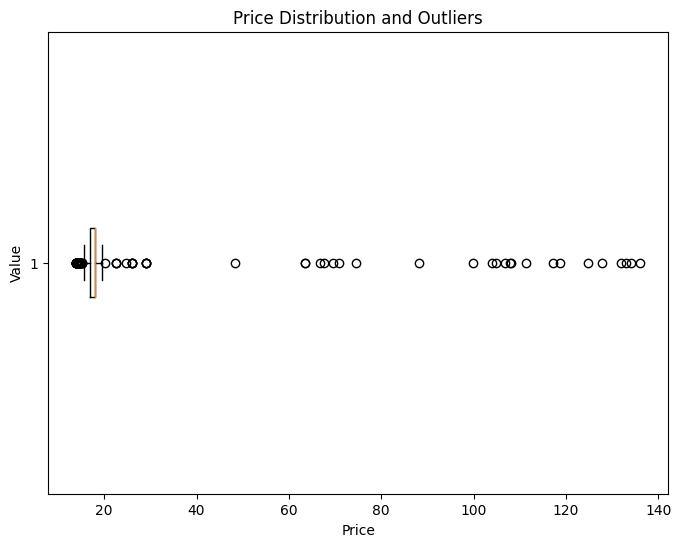

Descriptive Statistics:
Mean: 24.89176691729323
Median: 17.99
Standard Deviation: 24.86043769780813
Min: 13.98
Max: 136.0

Outliers:
1       13.99
2       13.99
7       15.10
8       15.10
9       15.10
        ...  
225     13.98
239    131.95
252    111.24
255     14.00
265     20.26
Length: 74, dtype: float64


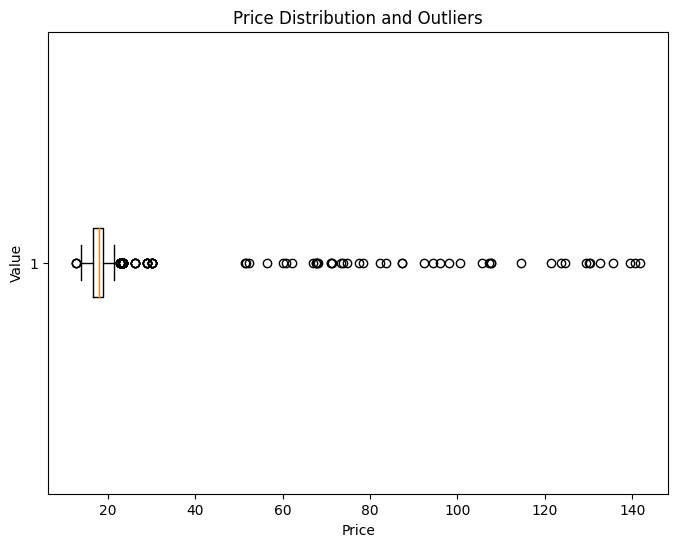

Descriptive Statistics:
Mean: 23.75602495543672
Median: 17.99
Standard Deviation: 21.807326326082098
Min: 12.85
Max: 141.75

Outliers:
0       92.30
27      87.34
33      60.20
72      98.10
77      23.59
        ...  
516    140.55
520     26.24
542    141.75
544     26.24
560     26.24
Length: 85, dtype: float64


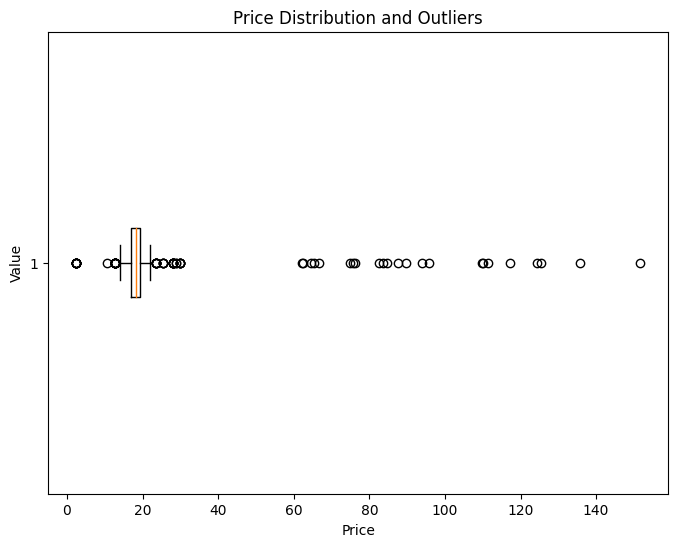

Descriptive Statistics:
Mean: 22.90078260869565
Median: 18.17
Standard Deviation: 20.371688779927116
Min: 2.49
Max: 151.6

Outliers:
35     12.79
37     12.79
39     12.79
41     12.79
43     12.79
       ...  
313    87.68
316    83.58
319    89.60
336    23.64
342    23.64
Length: 74, dtype: float64


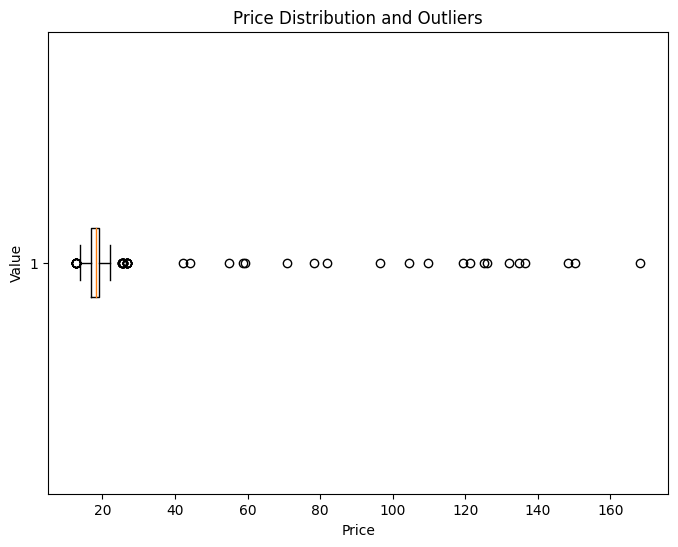

Descriptive Statistics:
Mean: 21.930514541387026
Median: 18.17
Standard Deviation: 19.869867805187837
Min: 12.79
Max: 168.16

Outliers:
2       44.06
46      12.79
48      12.79
50      12.79
52      12.79
54      12.79
56      12.79
58      12.79
60      54.84
62      12.79
66      12.79
70      12.79
71      12.79
72      12.79
132     96.49
133    131.97
136     25.36
148     78.40
153     82.02
154     25.36
156     25.36
159     25.36
181    150.24
184     26.62
187     26.62
194     26.62
205    119.42
215    121.22
282     70.91
286     25.59
288    109.76
292     25.59
300     25.59
305    136.54
309     25.59
316     25.59
318     58.61
323    104.45
335     26.62
339    126.01
346     42.24
347    168.16
361     26.62
363     26.62
365    148.42
372     26.62
375    125.09
379     26.62
432     59.30
442    134.68
dtype: float64


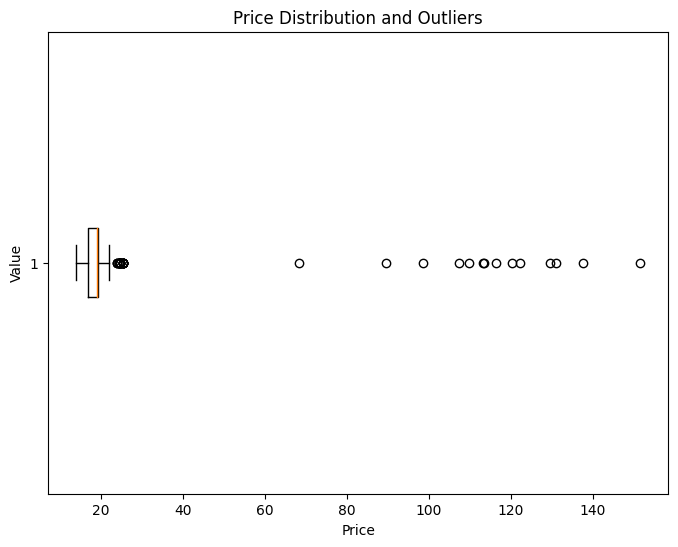

Descriptive Statistics:
Mean: 23.985378486055776
Median: 18.99
Standard Deviation: 22.808901511387504
Min: 13.99
Max: 151.57

Outliers:
2       24.71
4       24.71
6       89.65
7       24.71
13      68.33
18      24.71
21      24.71
22     109.87
23     131.13
36      24.71
41      24.71
43      24.71
54      24.52
63      24.52
68      24.52
74     113.24
75     116.41
82      24.52
83      24.52
98      25.34
101     25.34
106     25.34
109    107.30
115     25.34
122     25.34
130     25.34
132     25.34
133     98.56
134    129.68
137     25.34
140     25.34
168    151.57
175    113.53
200     23.91
207    137.70
218     23.91
230    120.27
233    122.20
248     23.91
dtype: float64


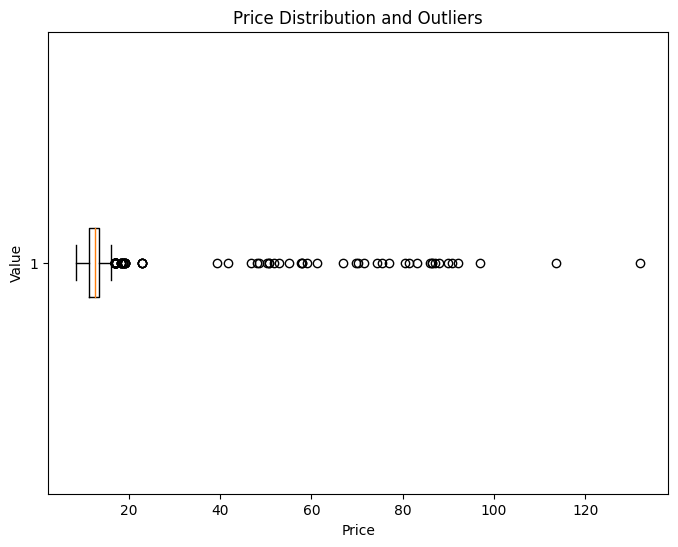

Descriptive Statistics:
Mean: 17.653622559652927
Median: 12.49
Standard Deviation: 16.969099989605493
Min: 8.49
Max: 131.97

Outliers:
5      80.39
43     96.95
66     69.77
74     18.61
82     50.75
       ...  
409    16.99
410    16.99
411    16.99
412    22.84
431    77.09
Length: 97, dtype: float64


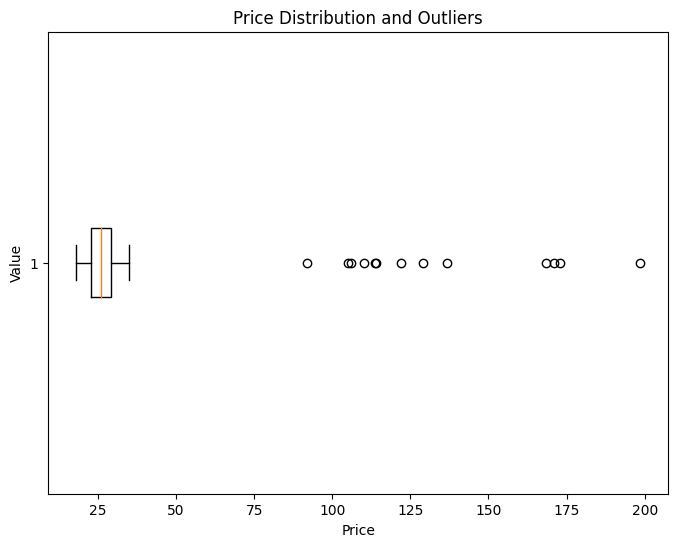

Descriptive Statistics:
Mean: 32.41955445544554
Median: 25.9
Standard Deviation: 28.02422596779499
Min: 18.06
Max: 198.49

Outliers:
12     121.98
28     110.12
29     104.88
36     113.61
47     168.37
48      91.88
63     136.85
69     129.00
74     198.49
85     172.74
96     170.87
140    106.05
147    114.00
dtype: float64


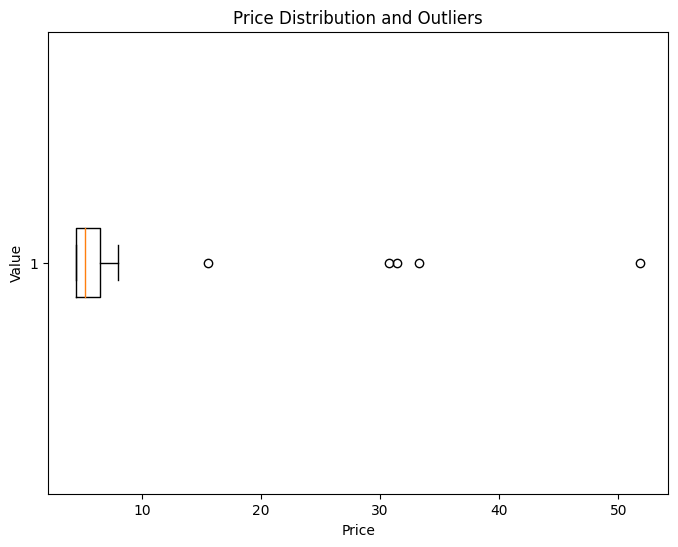

Descriptive Statistics:
Mean: 6.998888888888889
Median: 5.19
Standard Deviation: 7.258440948302879
Min: 4.49
Max: 51.82

Outliers:
5     51.82
24    31.44
39    33.27
42    15.56
60    30.72
dtype: float64


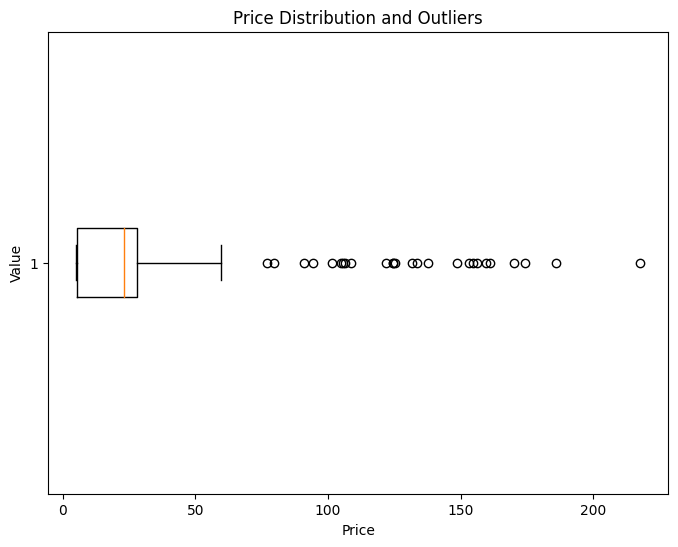

Descriptive Statistics:
Mean: 27.398009478672982
Median: 22.9
Standard Deviation: 30.288307525355453
Min: 5.1
Max: 217.67

Outliers:
5      106.53
6      186.05
7      108.55
15      94.30
16     174.29
17     124.66
22     148.69
54      76.91
81     159.75
92     153.22
93     101.40
105    217.67
111    161.19
129    170.16
148    133.41
175    156.29
181     91.07
202    104.81
213    125.14
257    131.86
280    124.69
296     79.56
318    154.59
324    137.63
349    121.86
370    105.57
dtype: float64


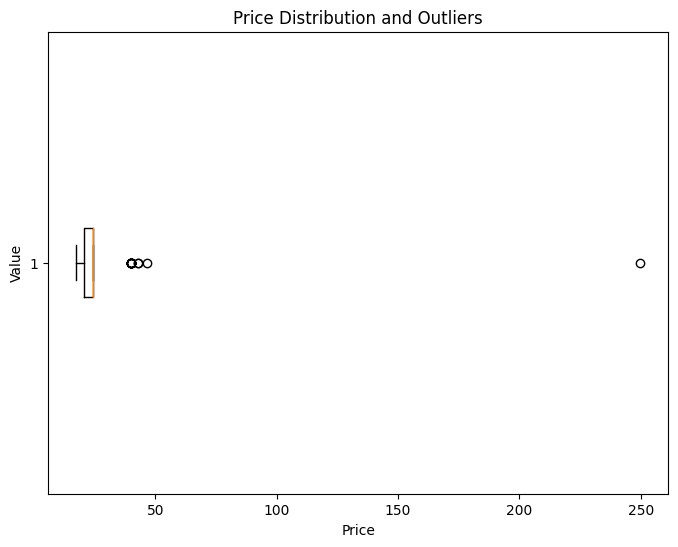

Descriptive Statistics:
Mean: 26.468169014084516
Median: 24.15
Standard Deviation: 19.93363267237888
Min: 17.49
Max: 249.65

Outliers:
61     39.90
62     39.90
63     39.90
64     39.90
65     39.90
68     39.90
69     39.90
70     39.90
71     39.90
73     39.90
74     39.90
76     39.90
78     39.90
80     42.87
82     46.79
83     39.90
84     42.87
85    249.65
86     39.90
87     39.90
dtype: float64


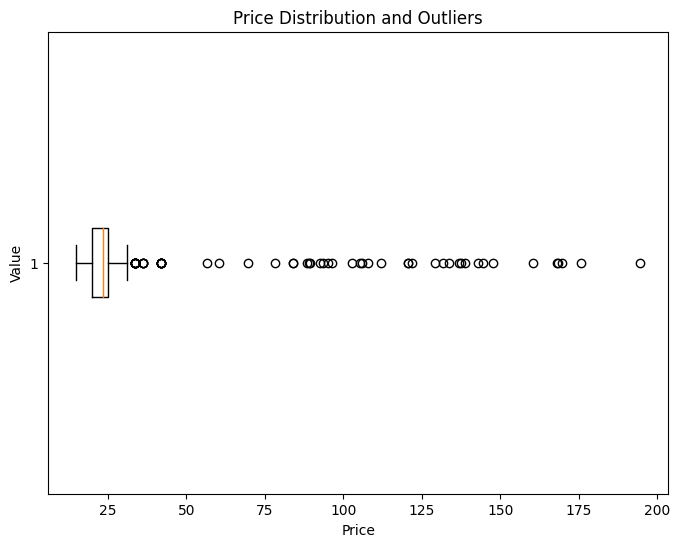

Descriptive Statistics:
Mean: 29.479419729206963
Median: 23.39
Standard Deviation: 26.231970376196905
Min: 14.99
Max: 194.42

Outliers:
5      105.19
7       56.61
12      69.56
78      96.23
94     136.75
        ...  
374     36.12
381     36.12
397    105.87
407    138.86
411     78.22
Length: 63, dtype: float64


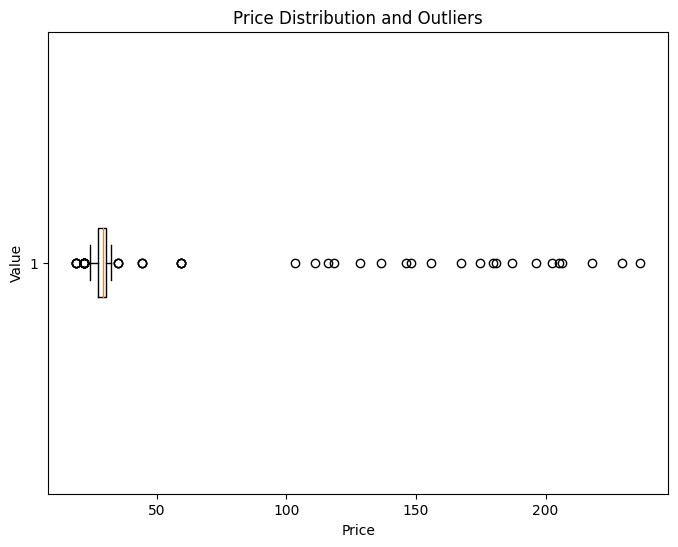

Descriptive Statistics:
Mean: 40.579
Median: 29.19
Standard Deviation: 40.92694962763891
Min: 18.99
Max: 236.43

Outliers:
1       21.89
3       21.89
5      103.26
14     205.02
18      21.89
19      21.89
23     186.97
24     136.69
26      44.21
28     110.98
32     206.20
33     180.84
46      44.21
62      44.21
72     202.44
76      59.33
84      59.33
85     217.83
87      59.33
91     196.44
92     179.59
98      59.33
101    236.43
103    147.92
105    155.77
107    229.56
113    174.85
155     21.89
156     21.89
161     21.89
163     21.89
165    167.23
167     21.89
169    146.27
171     35.06
173     21.89
175     21.89
177     21.89
179     21.89
181     21.89
183     21.89
187     21.89
191     35.06
196     35.06
198     21.89
199    128.46
200     21.89
202    116.06
203     18.99
204     18.99
205     18.99
206     18.99
210     18.99
240    118.32
dtype: float64


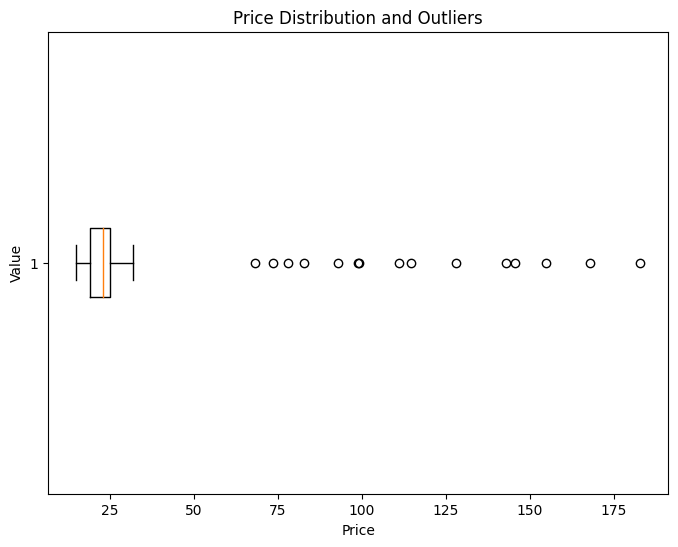

Descriptive Statistics:
Mean: 27.063813229571988
Median: 22.99
Standard Deviation: 23.95464927986278
Min: 14.99
Max: 182.71

Outliers:
44     128.05
45      99.01
51     110.87
74     142.95
75     182.71
118     98.89
131    145.41
133     92.77
134    154.70
149     68.10
188     82.62
196    114.45
197    167.70
211     78.01
245     73.41
dtype: float64


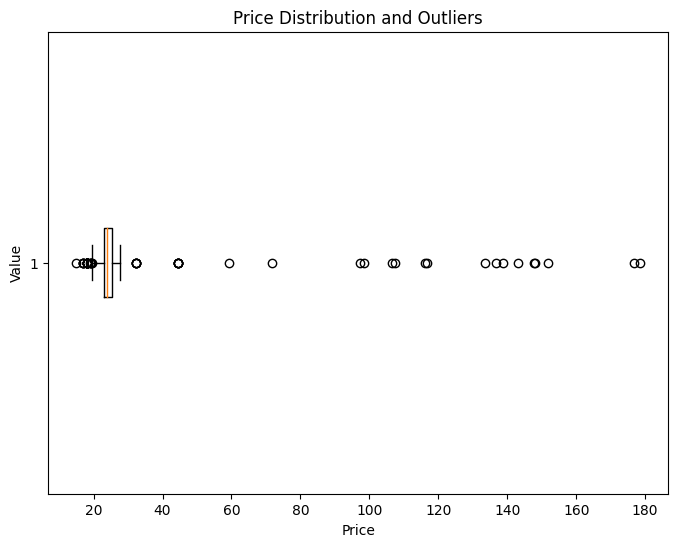

Descriptive Statistics:
Mean: 36.129720279720274
Median: 23.99
Standard Deviation: 35.060804304989276
Min: 14.99
Max: 178.5

Outliers:
0       19.19
1       19.19
5      176.71
6      136.59
11     133.44
12     143.22
16     107.33
17      44.51
19     151.88
20      44.51
25      44.51
27      44.51
28      19.19
30      59.29
31     116.11
32      19.39
34      44.51
36     116.58
39     148.09
41      18.89
42      44.51
50      32.38
51     106.67
60      32.38
69     138.70
70     147.71
74     178.50
76      32.38
81      32.38
82      32.38
90      14.99
97      17.99
98      16.99
99      17.99
100     16.99
101     17.99
102     17.99
104     17.99
105     17.99
106     17.99
107     17.99
108     71.63
109     16.99
110     17.99
111     16.99
113     17.99
114     97.40
115     98.58
118     17.99
119     17.99
121     17.99
125     17.99
dtype: float64


In [122]:
# Customer Price Analysis
selected_customer = 'Unilever'
selected_brand = 'Dove'
selected_retailers = ['Amazon', 'DrogaRaia', 'Drogasil', 'Mercado Livre']

df_join3 = df_prod.merge(right = df_coletas, how='inner',\
                        on = 'MasterKey_RetailerProduct').groupby(\
                                                                ['Customer','Specifics', 'Competitor', 'Product',
                                                                'Brand','EAN','Retailer','MasterKey_RetailerProduct',
                                                                'DateIns'])['FinalPrice','SuggestedPrice'].mean()


df_join3['FinalPrice'] = np.round(df_join3['FinalPrice'].values,decimals = 2)
df_join3.reset_index(inplace = True)

df_selected = df_join3[(df_join3['Customer'] == selected_customer)&
                                (df_join3['Brand'] == selected_brand)&
                                (df_join3['Competitor'] == 0)]


for ean in pd.unique(df_selected['EAN']):
    df_ean = df_selected[df_selected['EAN'] == ean]
    descriptive_stats(df_ean["FinalPrice"].values)